# Investigation on Index of Multiple Deprivation Health Variation with Green-Space Quality and Healthcare Servicesin London


## 1. Resarch Design

### 1.1 Introduction

This notebook implements a comprehensive analytical framework to investigate how green space quality and healthcare service provision jointly explain spatial variation in health deprivation across London's Lower Layer Super Output Areas (LSOAs). The analysis addresses a critical gap in urban health research by moving beyond single-factor approaches to examine the combined and interactive effects of environmental and healthcare accessibility factors.

### 1.2 Research Objectives

**Research Aim**

This study aims to explore the relationships between urban environmental amenities and health deprivation patterns across London's Lower Layer Super Output Areas. The investigation seeks to understand how greenspace quality and healthcare service accessibility may jointly influence neighbourhood health outcomes, building on established theoretical frameworks linking place-based factors to population health (Diez Roux and Mair, 2010; Macintyre et al., 2002).

**Specific Objectives**

1. To map and quantify the spatial distribution of health deprivation, greenspace provision, and healthcare services across London LSOAs
2. To develop and validate a comprehensive greenspace quality index incorporating multiple environmental dimensions, following methodological approaches established by Nguyen et al. (2021) and Zhang et al. (2022)
3. To examine the statistical relationships between environmental factors and area-level health outcomes using predictive modelling approaches
4. To identify which environmental amenities appear most strongly associated with health deprivation patterns

**Research Questions**

The primary research question asks: To what extent do greenspace quality measures and healthcare service distribution patterns explain spatial variation in health deprivation across London neighbourhoods?

Secondary questions include:
- How does a multi-dimensional greenspace quality index compare to simple area-based measures in explaining health outcomes?
- Which components of the urban environment show the strongest statistical associations with health deprivation?
- What spatial patterns emerge in the distribution of environmental amenities and health outcomes across London?

**Research Hypotheses**

Based on existing literature, this study tentatively hypotheses that:

H1: Areas with higher comprehensive greenspace quality scores will tend to exhibit lower health deprivation levels, consistent with findings from Chen et al. (2021) and Feng and Astell-Burt (2018) demonstrating protective effects of greenspace on mental and physical health outcomes

H2: Healthcare service accessibility will show negative associations with health deprivation scores, reflecting established patterns of healthcare geography and service utilisation (Vargas Adorno et al., 2025)

H3: Environmental factors together will explain a substantial proportion of variance in area-level health outcomes, supporting multi-domain approaches to urban health research (Mueller et al., 2017)

H4: Multi-dimensional environmental measures will outperform single-indicator approaches in explaining health patterns, as suggested by recent systematic reviews emphasising greenspace quality over quantity (Nguyen et al., 2021)

**Project Scope**

This analysis focuses on London as a case study due to its diverse socioeconomic geography and well-documented health inequalities (Ngan et al., 2025). The study employs cross-sectional analysis using 2010-2011 data, which provides temporal consistency across datasets while acknowledging limitations in capturing recent urban changes.

The project contributes to urban health geography by developing methodological approaches for integrating multiple environmental data sources and testing their collective explanatory power for neighbourhood health outcomes. The findings may inform evidence-based urban planning approaches that consider health impacts of environmental interventions, addressing calls for more integrated approaches to healthy city planning.


The scope is limited to statistical association rather than causal inference, given the cross-sectional design and observational nature of the data. Results should be interpreted as exploratory analysis that may guide future longitudinal research and policy considerations.

### 1.3 Analytical Approach


The notebook implements a three-stage analytical pipeline:

1. Data Integration and Preprocessing: Combining IMD health data, OS Open Greenspace data, healthcare POI locations, and LSOA boundaries into a unified analytical framework
2. Feature Engineering and Dimensionality Reduction: Using Principal Component Analysis to address multicollinearity in green space features and sparsity in healthcare POI data
3. Predictive Modeling and Interpretation: Employing Random Forest regression with SHAP (Shapley Additive Explanations) analysis to identify key determinants and quantify their relative contributions

## 2. Data Sources

This analysis integrates five comprehensive datasets to examine the spatial relationships between health outcomes, environmental amenities, and healthcare accessibility across London neighborhoods:


### 2.1 Index of Multiple Deprivation (IMD) Data

Source: UK Data Service - Index of Multiple Deprivation dataset

URL: https://data.geods.ac.uk/dataset/index-of-multiple-deprivation-imd/resource/6232c48b-ac82-49ac-a77c-0693a68b33e4

The IMD provides standardized deprivation scores across multiple domains including health, income, employment, and education at Lower Layer Super Output Area (LSOA) level. The Health Deprivation and Disability subdomain serves as our dependent variable, capturing area-level health outcomes through composite indicators of premature mortality, morbidity, and disability rates. This official government dataset ensures robust socioeconomic analysis capabilities and is widely validated in academic health geography research.

### 2.2 Points of Interest (POI) Data

Source: Ordnance Survey - Points of Interest Dataset

URL: https://docs.os.uk/os-downloads/addressing-and-location/points-of-interest

Comprehensive location data for healthcare facilities, wellness services, and health-related amenities across London. This dataset includes precise geographic coordinates and detailed categorization for hospitals, pharmacies, dental practices, fitness centers, alternative healthcare providers, and specialized medical services. The high spatial accuracy and extensive categorization enable detailed analysis of healthcare accessibility patterns and service clustering effects on neighborhood health outcomes.

### 2.3 Greenspace Data

Source: OS Open Greenspace Dataset (data.gov.uk)

URL: https://www.data.gov.uk/dataset/4c1fe120-a920-4f6d-bc41-8fd4586bd662/os-open-greenspace1

Official government dataset providing comprehensive coverage of parks, gardens, recreational grounds, and other green infrastructure across England. This dataset includes spatial boundaries, green space classifications, and accessibility indicators essential for calculating coverage percentages, connectivity metrics, proximity measures, and developing composite green space quality indices. The dataset's standardized classification system enables consistent quality assessment across diverse green space types.

### 2.4 Lower Layer Super Output Areas (LSOA) Boundaries

Source: ONS Geography Portal - LSOA Boundaries

URL: https://geoportal.statistics.gov.uk/datasets/ons::lower-layer-super-output-areas-december-2011-boundaries-ew-bfc-v3/about

Standardized geographic boundaries defining statistical areas with populations between 1,000-3,000 residents, providing consistent spatial units for analysis. These boundaries serve as the primary geographic framework for aggregating health outcomes, environmental features, and service accessibility measures. The LSOA system ensures comparability across different datasets and enables robust small-area analysis while maintaining statistical disclosure control.

### 2.5 London Statistical Boundaries

Source: Greater London Authority - Statistical GIS Boundary Files

URL: https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london/

Additional administrative geography layers providing London-specific boundary definitions and contextual spatial information. These boundaries supplement the national LSOA framework with local administrative contexts, enabling more nuanced analysis of London's unique urban geography and facilitating integration with local policy frameworks.

### 2.6 Data Integration Strategy

The multi-source integration approach ensures comprehensive coverage of health determinants while maintaining data quality and reliability. All datasets represent official government or authorized sources, providing consistency in data standards, temporal alignment, and spatial accuracy. The combination creates a robust analytical framework that captures:

Health outcomes through validated composite indicators (IMD)
Environmental factors through comprehensive green space coverage and quality measures
Healthcare accessibility through detailed facility location and service type data
Spatial context through standardized geographic boundaries

This integrated dataset enables examination of complex interactions between environmental amenities and healthcare services that cannot be captured through single-source analyses, supporting the multi-domain analytical approach required to understand urban health equity patterns.

## 3. Data Wrangling

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
import numpy as np

from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
import mapclassify as mc



### 3.1 London Geographic Boundaries

#### 3.1.1 London Boundary Data

Loading London Boundary Data

In [2]:
london_boundary = gpd.read_file('/Users/wangyutong/Library/CloudStorage/OneDrive-UniversityofLeeds/dissertation/data/03_gla/London_GLA_Boundary.shp')


Visualization

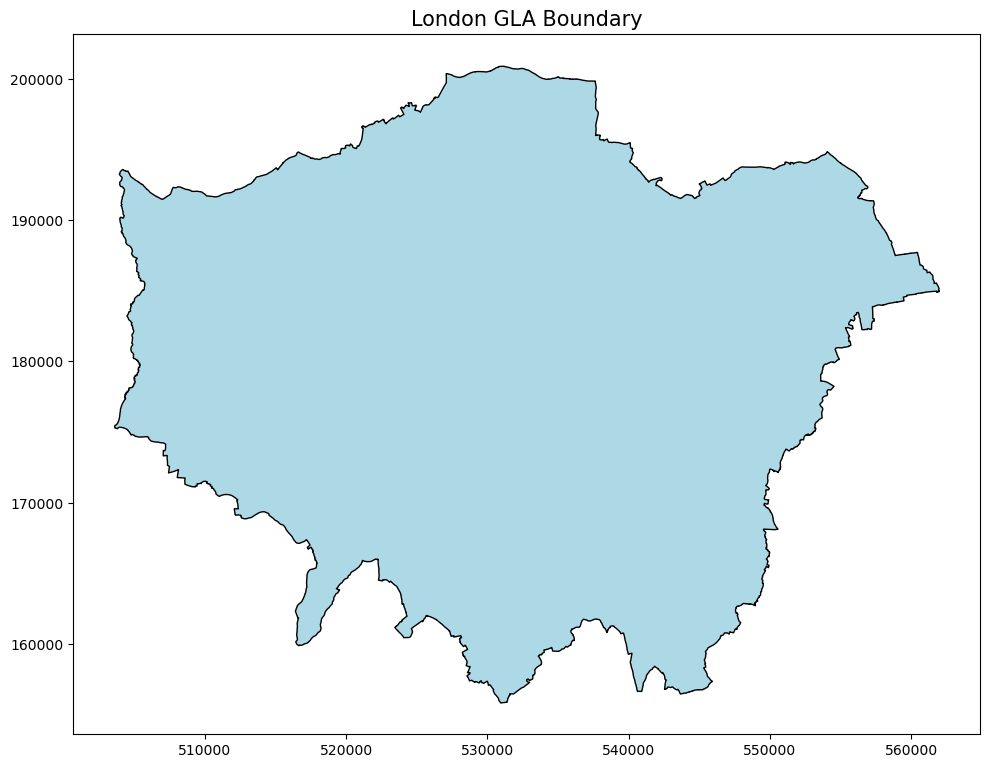

In [3]:
fig, ax = plt.subplots(figsize=(10, 10))
london_boundary.plot(ax=ax, color='lightblue', edgecolor='black')
plt.title('London GLA Boundary', fontsize=15)
plt.tight_layout()
plt.show()

In [4]:
print(f"CRS: {london_boundary.crs}")

CRS: EPSG:27700


In [5]:
london_boundary.head()

NAME  HECTARES  NONLD_AREA  POLY_ID  \
0  London Euro Region  159469.7    2129.716   124433   

                                            geometry  
0  POLYGON ((531643.6 200802.7, 531658.6 200794.2...

#### 3.1.2 LSOA Administrative Units

Loading the England LSOA dataset 

In [6]:
lsoa_shapefile_path = '/Users/wangyutong/Library/CloudStorage/OneDrive-UniversityofLeeds/dissertation/data/LSOA_England_2011/LSOA_2011_EW_BFC_V3.shp'
lsoa_data = gpd.read_file(lsoa_shapefile_path)

In [7]:
print(f"Number of LSOA areas: {len(lsoa_data)}")
print(f"CRS: {lsoa_data.crs}")

Number of LSOA areas: 34753
CRS: EPSG:27700


In [8]:
lsoa_data.head()

LSOA11CD                   LSOA11NM   BNG_E   BNG_N     LONG_      LAT  \
0  E01000001        City of London 001A  532123  181632 -0.097140  51.5182   
1  E01000002        City of London 001B  532480  181715 -0.091970  51.5188   
2  E01000003        City of London 001C  532239  182033 -0.095320  51.5217   
3  E01000005        City of London 001E  533581  181283 -0.076270  51.5147   
4  E01000006  Barking and Dagenham 016A  544994  184274  0.089317  51.5387   

    Shape_Leng                              GlobalID  \
0  2635.767993  eaf9e4b8-fcc1-4cae-a46c-22c8a43ff39b   
1  2707.881853  4434ca6e-e270-4e88-b3eb-4cfb37f62490   
2  1224.638192  d0ff9760-86dc-40da-ad33-3b1dc987ef04   
3  2275.805348  474caa9f-a6e3-4de2-8bc1-2f5b0da40271   
4  1966.092607  ff2bc9a6-9e26-4415-9cec-eaea2c0a4f54   

                                            geometry  
0  POLYGON ((532151.537 181867.433, 532152.5 1818...  
1  POLYGON ((532634.497 181926.016, 532632.048 18...  
2  POLYGON ((532153.703 182165.155, 532158.25 182...  
3  POLYGON ((533619.062 181402.364, 533639.868 18...  
4  POLYGON ((545126.852 184310.838, 545145.213 18...

filter the London LSOA from the England data

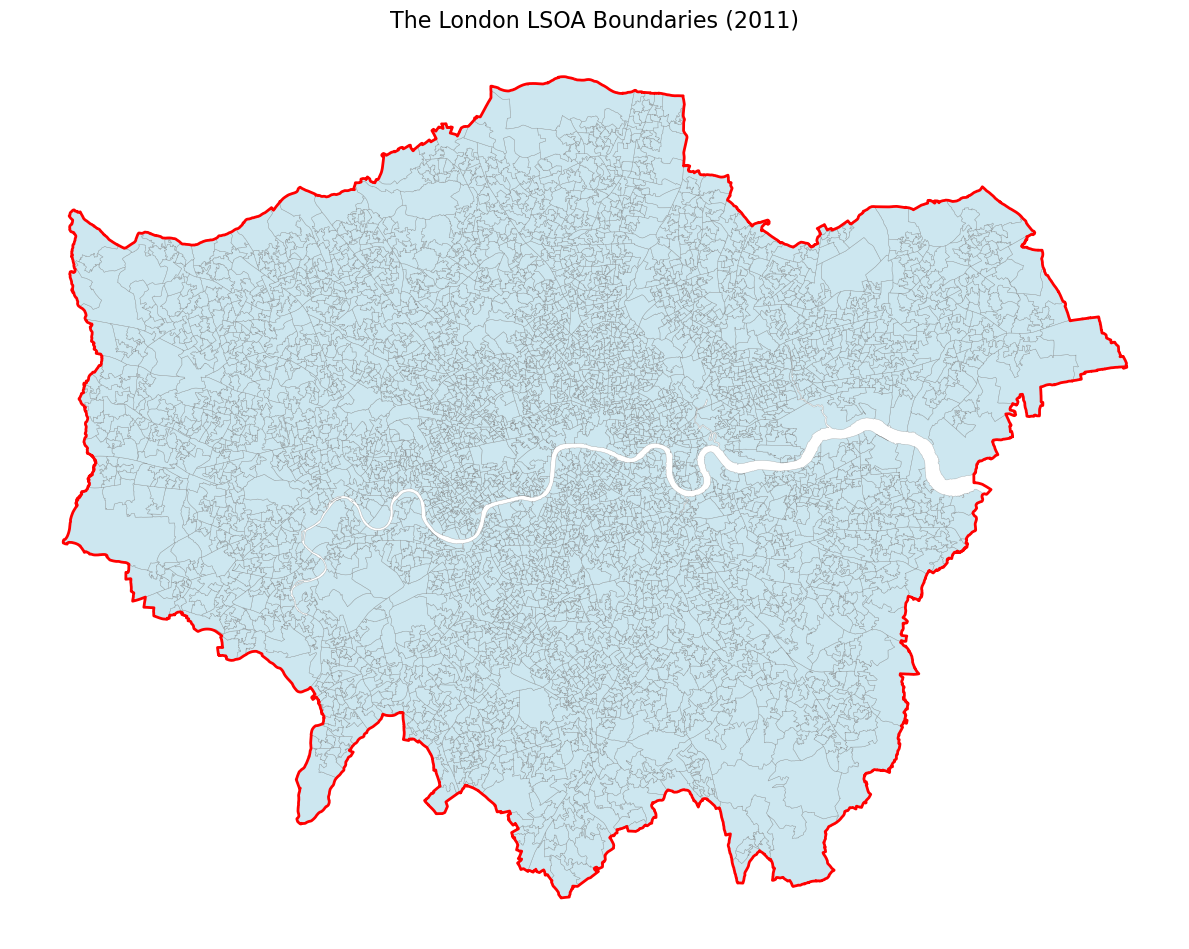


Filtered London LSOA data is ready, with 4969 areas


In [9]:
london_lsoa = gpd.overlay(lsoa_data, london_boundary, how='intersection')

# plot the filtered London LSOA data
fig, ax = plt.subplots(figsize=(12, 10))
london_lsoa.plot(ax=ax, color='lightblue', edgecolor='grey', alpha=0.6, linewidth=0.3)
london_boundary.boundary.plot(ax=ax, color='red', linewidth=2)
plt.title('The London LSOA Boundaries (2011)', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


london_lsoa_clean = london_lsoa.copy()
print(f"\nFiltered London LSOA data is ready, with {len(london_lsoa_clean)} areas")

### 3.2 Health Deprivation Data

#### 3.2.1 IMD Health Data Integration  


Loading the UK IMD Health Data

In [10]:
lsoa_lookup = london_lsoa_clean[['LSOA11CD']].copy()
lsoa_lookup['LSOA code (2011)'] = lsoa_lookup['LSOA11CD'] 

imd_health_path = '/Users/wangyutong/Library/CloudStorage/OneDrive-UniversityofLeeds/dissertation/data/01_IMD.csv'
imd_health = pd.read_csv(imd_health_path)


Intersect the London LSOA data with UK IMD Health data and get the london health data

In [11]:
london_health_map = london_lsoa_clean.merge(
  imd_health,
  left_on='LSOA11CD',
  right_on='LSOA code (2011)',
  how='left'
)

print(f"Number of merged records: {len(london_health_map)}")

Number of merged records: 4969


Check the missing data and deal with it

In [12]:
health_col = '2010IMD score' 
missing_lsoa = london_health_map[london_health_map[health_col].isnull()]
print(f"the missing LSOA count: {len(missing_lsoa)}")

the missing LSOA count: 0


Find the null reason and deal with these

In [13]:
print(missing_lsoa[:20]) 

Empty GeoDataFrame
Columns: [LSOA11CD, LSOA11NM, BNG_E, BNG_N, LONG_, LAT, Shape_Leng, GlobalID, NAME, HECTARES, NONLD_AREA, POLY_ID, geometry, LSOA code (2011), LSOA name (2011), Local Authority District code (2013), Local Authority District name (2013), 2010IMD score, 2010National quintile1, 2010National decile2, 2010imd_rank]
Index: []

[0 rows x 21 columns]


I observed 134 LSOAs with NaN in the IMD health fields. Inspection shows these LSOAs (e.g., South Bucks, Thurrock, Slough, Broxbourne, Brentwood, Epping Forest) lie outside the Greater London boundary. Although the NAME attribute is “London Euro Region”, their centroid coordinates fall beyond the GLA boundary, so they are not part of our study area. Because our IMD file only contains health metrics for London LSOAs, these external LSOAs do not match during the join and appear as NaN.
To ensure a consistent spatial extent, we clip the LSOA layer to the Greater London boundary and drop non-London LSOAs before analysis.

In [14]:
london_health_map = london_health_map[~london_health_map[health_col].isnull()].copy()
print(f"the remaining LSOA count: {len(london_health_map)}")

the remaining LSOA count: 4969


#### 3.2.2 Health Score Visualization

The health score comes from the Health Deprivation and Disability rank in the IMD. In the original data, a higher rank means better health and less deprivation. I reverse this so that a higher score means worse health and more deprivation. This makes the map easier to read: higher scores show poorer health conditions.

In [15]:
london_health_map['imd_health_score'] = london_health_map[health_col]
max_rank = london_health_map[health_col].max()
london_health_map['imd_health_score'] = max_rank + 1 - london_health_map[health_col]


create a standardized version (z-score) for statistical comparisons

In [16]:
london_health_map['imd_health_score_z'] = (
  london_health_map['imd_health_score'] - london_health_map['imd_health_score'].mean()
) / london_health_map['imd_health_score'].std()


Get the statistical information

In [17]:
# Save the health data merged with LSOA geometries to CSV
london_health_map.to_csv('london_lsoa_health_scores.csv', index=False)
print(f"Health scores data saved to 'london_lsoa_health_scores.csv' with {len(london_health_map)} records")

Health scores data saved to 'london_lsoa_health_scores.csv' with 4969 records


In [18]:
health_stats = london_health_map['imd_health_score'].describe()

print("statistics:")
print(health_stats)

statistics:
count    4969.000000
mean       42.284438
std        13.279330
min         1.000000
25%        32.630000
50%        43.800000
75%        53.390000
max        65.670000
Name: imd_health_score, dtype: float64


Visualize the spatial analysis of health inequalities in London, including the spatial and statistical distributions of health deprivation, as well as a grouped map showing different health deprivation levels.

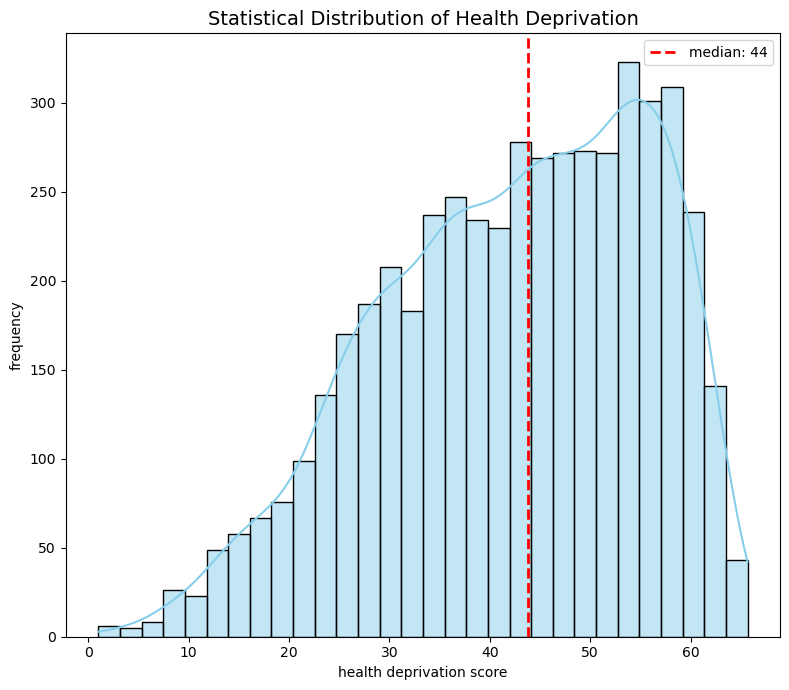

In [19]:
# 2. the statistical distribution of health deprivation
fig, ax = plt.subplots(1, 1, figsize=(8, 7))
sns.histplot(london_health_map['imd_health_score'].dropna(), kde=True, ax=ax, bins=30, color='skyblue')
ax.axvline(london_health_map['imd_health_score'].median(), color='red', linestyle='--', linewidth=2, 
      label=f'median: {london_health_map["imd_health_score"].median():.0f}')
ax.set_title('Statistical Distribution of Health Deprivation', fontsize=14)
ax.set_xlabel('health deprivation score')
ax.set_ylabel('frequency')
ax.legend()
plt.tight_layout()
plt.show()

The statistical distribution of health deprivation scores across London's LSOAs reveals a distinctive bimodal pattern with two notable peaks - one around score 20 and another more pronounced peak around score 55, suggesting the presence of distinct population clusters with different health outcomes. 

The distribution shows a right-skewed pattern with the median at 44, indicating that while many areas experience moderate health deprivation, there is a substantial tail of areas with higher deprivation scores. 

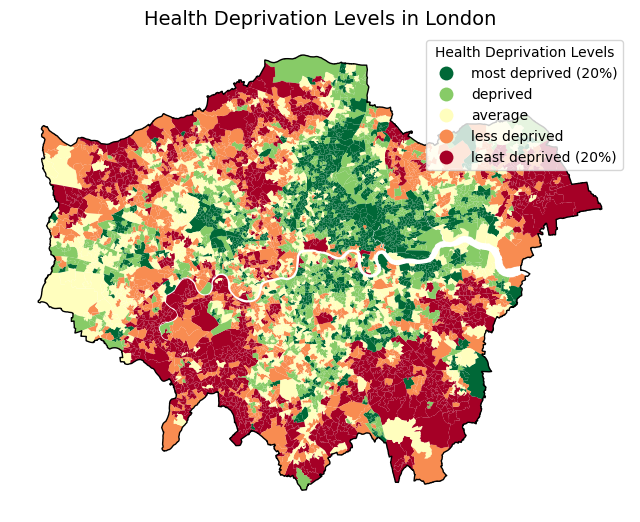

In [20]:
# 3. the grouped map of health deprivation levels
fig, ax = plt.subplots(1, 1, figsize=(8, 7))

london_health_map['health_quintile'] = pd.qcut(london_health_map['imd_health_score'], 
                        q=5, labels=['most deprived (20%)', 'deprived', 'average', 'less deprived', 'least deprived (20%)'])
london_health_map.plot(column='health_quintile', categorical=True, 
            cmap='RdYlGn_r', legend=True, ax=ax,
            legend_kwds={'title': 'Health Deprivation Levels'})
london_boundary.boundary.plot(ax=ax, color='black', linewidth=1)
ax.set_title('Health Deprivation Levels in London', fontsize=14)
ax.set_axis_off()

The most deprived areas (dark red) concentrated in East London, forming a distinct corridor of health disadvantage that contrasts sharply with the more affluent central and western areas.

 Conversely, the least deprived areas (dark green) are predominantly located in outer London boroughs, particularly in the north and southwest, suggesting a core-periphery pattern where health outcomes generally improve with distance from the urban center.

### 3.3 Greenspace Data

#### 3.3.1 Read the Greenspace Dataset

Loading the data

In [21]:
greenspace_file_path = '/Users/wangyutong/Library/CloudStorage/OneDrive-UniversityofLeeds/dissertation/data/04_OS-Greenspace-data/GB_GreenspaceSite.shp'
london_greenspace = gpd.read_file(greenspace_file_path)

print(f"shape: {london_greenspace.shape}")
print(f"CRS: {london_greenspace.crs}")

shape: (161954, 7)
CRS: EPSG:27700


In [22]:
print(london_greenspace.head())

                                     id    function distName1 distName2  \
0  2BE88E2E-6150-7FED-E063-AAEFA00A0EDD  Play Space      None      None   
1  2BE88E2E-6011-7FED-E063-AAEFA00A0EDD    Cemetery      None      None   
2  2BE88DD0-F4E8-7FED-E063-AAEFA00A0EDD  Play Space      None      None   
3  2BE88E49-021F-7FED-E063-AAEFA00A0EDD    Cemetery      None      None   
4  2BE88E21-A64D-7FED-E063-AAEFA00A0EDD    Cemetery      None      None   

  distName3 distName4                                           geometry  
0      None      None  POLYGON Z ((462520.89 1190881.72 0, 462524.51 ...  
1      None      None  MULTIPOLYGON Z (((451419.62 1190989.39 0, 4514...  
2      None      None  POLYGON Z ((451031.61 1191230.69 0, 451024.32 ...  
3      None      None  POLYGON Z ((461911.7 1202923.23 0, 461937.5 12...  
4      None      None  POLYGON Z ((456682.07 1204040.27 0, 456666.11 ...  


#### 3.3.2 Green Space Coverage Analysis

Preprocess the data for later analysis by performing a spatial join with the London boundary and calculating the total greenspace area for each LSOA.

In [23]:
# spatial join: greenspace and LSOA
greenspace_lsoa = gpd.overlay(london_greenspace, london_lsoa_clean, how='intersection')
greenspace_lsoa['intersection_area'] = greenspace_lsoa.geometry.area
lsoa_id_col = 'LSOA11CD'

# get the total greenspace area for each LSOA
lsoa_greenspace_summary = greenspace_lsoa.groupby(lsoa_id_col).agg({
    'intersection_area': 'sum',
    'LSOA11NM': 'first'
}).reset_index()

lsoa_greenspace_summary.rename(columns={'intersection_area': 'greenspace_area_sqm'}, inplace=True)

london_lsoa_analysis = london_lsoa_clean.merge(lsoa_greenspace_summary, 
                                          how='left', 
                                          on=lsoa_id_col)

london_lsoa_analysis['greenspace_area_sqm'] = london_lsoa_analysis['greenspace_area_sqm'].fillna(0)
london_lsoa_analysis['lsoa_area_sqm'] = london_lsoa_analysis.geometry.area
london_lsoa_analysis['greenspace_pct'] = (
    london_lsoa_analysis['greenspace_area_sqm'] / 
    london_lsoa_analysis['lsoa_area_sqm']
) * 100

# convert areas to square kilometers for easier interpretation
london_lsoa_analysis['greenspace_area_km2'] = london_lsoa_analysis['greenspace_area_sqm'] / 1000000
london_lsoa_analysis['lsoa_area_km2'] = london_lsoa_analysis['lsoa_area_sqm'] / 1000000

print(f"completed count of {len(london_lsoa_analysis)}")


completed count of 4969


Get the statistics for greenspace percentage.

In [24]:
print("\nGreenspace percentage statistics:")
print(london_lsoa_analysis['greenspace_pct'].describe())

print("\nGreenspace area statistics (square kilometers):")
print(london_lsoa_analysis['greenspace_area_km2'].describe())


Greenspace percentage statistics:
count    4969.000000
mean        9.895344
std        15.884973
min         0.000000
25%         0.148860
50%         2.662296
75%        12.859750
max       169.956059
Name: greenspace_pct, dtype: float64

Greenspace area statistics (square kilometers):
count    4969.000000
mean        0.052014
std         0.186445
min         0.000000
25%         0.000188
50%         0.004662
75%         0.033715
max         4.958527
Name: greenspace_area_km2, dtype: float64


Visualize the greenspace percentage map and greenspace area map

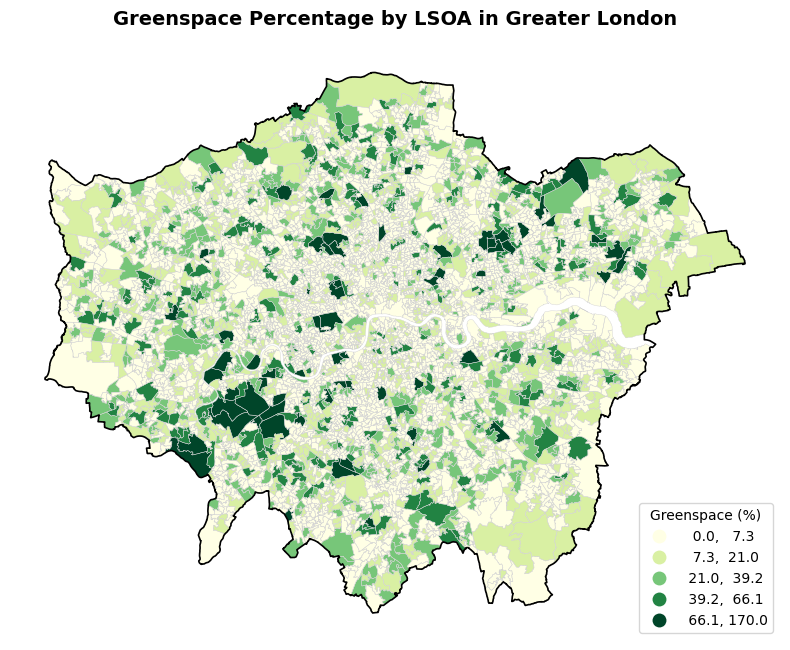

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(8, 7))

london_lsoa_analysis.boundary.plot(ax=ax, color='lightgrey', linewidth=0.3)

london_lsoa_analysis.plot(
    column='greenspace_pct',
    cmap='YlGn',
    scheme='NaturalBreaks',  
    k=5,
    linewidth=0,
    legend=True,
    ax=ax,
    legend_kwds={
        'title': "Greenspace (%)",
        'fmt': '{:.1f}',
        'loc': 'lower right'
    }
)

london_boundary.boundary.plot(ax=ax, color='black', linewidth=1.2)


ax.set_title(
    'Greenspace Percentage by LSOA in Greater London',
    fontsize=14, fontweight='bold', pad=15
)

ax.set_axis_off()

plt.tight_layout()
plt.show()


The map shows a concentration of high greenspace coverage (dark green areas) in outer London boroughs, particularly in the south and southwest regions, where large parks, commons, and green belt areas provide substantial environmental amenities.

In contrast, central London exhibits predominantly low greenspace percentages (light colors), reflecting the dense urban development and limited available space for green infrastructure in the city core. The spatial distribution reveals a clear center-periphery gradient, where greenspace availability generally increases with distance from the urban center

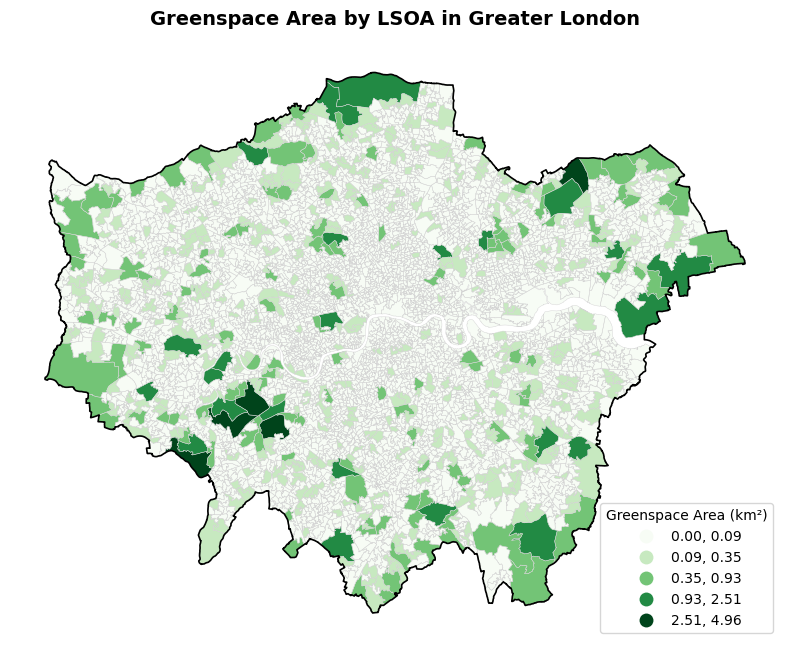

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(8, 7))


london_lsoa_analysis.boundary.plot(ax=ax, color='lightgrey', linewidth=0.3)


london_lsoa_analysis.plot(
    column='greenspace_area_km2',
    cmap='Greens',
    scheme='NaturalBreaks',  
    k=5, 
    linewidth=0,
    legend=True,
    ax=ax,
    legend_kwds={
        'title': "Greenspace Area (km²)",
        'fmt': '{:.2f}', 
        'loc': 'lower right'
    }
)


london_boundary.boundary.plot(ax=ax, color='black', linewidth=1.2)


ax.set_title(
    'Greenspace Area by LSOA in Greater London',
    fontsize=14, fontweight='bold', pad=15
)


ax.set_axis_off()

plt.tight_layout()
plt.show()


the map reveals inequalities in absolute greenspace availability, with outer London boroughs containing LSOAs with up to 4.96 km² of greenspace while central areas have virtually none (0.00-0.09 km²).


#### 3.3.3 Comprehensive Greenspace Quality Index Construction

The development of quality indicators for this analysis draws on empirical evidence demonstrating that environmental health benefits operate through multiple pathways beyond simple area-based measures. Research consistently indicates that greenspace quality dimensions may outperform quantity measures in predicting health outcomes. Feng and Astell-Burt (2018) found in their longitudinal study of 3,897 women that quality indicators showed significant associations with psychological distress while quantity measures demonstrated no association.

The composite approach incorporates five theoretically-grounded indicators based on established literature. Greenspace coverage percentage captures fundamental environmental availability, supported by Ngan et al. (2025) who demonstrated associations between grassland coverage and reduced preventable deaths in England's disadvantaged communities. Proximity measures within 500-metre walking distance reflect established accessibility thresholds, consistent with findings by Vargas Adorno et al. (2025) regarding public park accessibility and physical activity.

Quality weighting components address findings by Nguyen et al. (2021) regarding the differential health benefits of well-maintained versus unmanaged green areas. Connectivity measures incorporate social cohesion pathways identified by Zhang et al. (2022), whose Singapore study found that social interaction mediated associations between greenspace and general health. This multi-dimensional approach addresses identified research gaps where quality measures consistently outperform simple quantity indicators in health outcome prediction (Feng and Astell-Burt, 2018).

However, this process requires significant computational resources on my machine, so I have taken steps to optimize it. In the following sections, I will break it down into several steps.

Optimization 1: Apply sampling to green space data to reduce computation time

In [27]:
london_lsoa_clean['centroid'] = london_lsoa_clean.geometry.centroid
lsoa_centroids = np.array([[point.x, point.y] for point in london_lsoa_clean['centroid']])

# if the number of greenspaces is too large, sample them
if len(london_greenspace) > 10000:
    # order greenspaces by area and keep large greenspaces, sample small ones
    london_greenspace_sorted = london_greenspace.copy()
    london_greenspace_sorted['area'] = london_greenspace_sorted.geometry.area
    
    # keep all greenspaces larger than 5000 square meters
    large_greenspaces = london_greenspace_sorted[london_greenspace_sorted['area'] > 5000]

    # sample small greenspaces
    small_greenspaces = london_greenspace_sorted[london_greenspace_sorted['area'] <= 5000]
    sampled_small = small_greenspaces.sample(n=min(5000, len(small_greenspaces)), random_state=42)
    
    # combine large greenspaces and sampled small greenspaces
    greenspace_sample = pd.concat([large_greenspaces, sampled_small]).reset_index(drop=True)
    print(f"the total number of greenspaces is {len(london_greenspace)} and {len(greenspace_sample)} were sampled for calculation")
else:
    greenspace_sample = london_greenspace.copy()

greenspace_centroids = np.array([[point.x, point.y] for point in greenspace_sample.geometry.centroid])


the total number of greenspaces is 161954 and 63733 were sampled for calculation


Optimization 2: process LSOA in batches to reduce memory usage

In [28]:
batch_size = 500  
n_lsoa = len(lsoa_centroids)
nearest_distances = np.zeros(n_lsoa)
greenspaces_500m = np.zeros(n_lsoa)

for i in range(0, n_lsoa, batch_size):
    end_idx = min(i + batch_size, n_lsoa)
    batch_centroids = lsoa_centroids[i:end_idx]

    # calculate the nearest distances from this batch of LSOA centroids to all greenspace centroids
    distances = cdist(batch_centroids, greenspace_centroids)
    nearest_distances[i:end_idx] = distances.min(axis=1)
    greenspaces_500m[i:end_idx] = (distances <= 500).sum(axis=1)

london_lsoa_analysis['nearest_greenspace_dist'] = nearest_distances
london_lsoa_analysis['greenspaces_500m'] = greenspaces_500m

print("Completed!")

Completed!


Optimization 3: simplified metrics collection

In [29]:
# create proximity index (inverse of distance)
london_lsoa_analysis['greenspace_proximity'] = 1 / (london_lsoa_analysis['nearest_greenspace_dist'] + 1)

# create simplified weighted greenspace area index
london_lsoa_analysis['weighted_greenspace_simple'] = london_lsoa_analysis['greenspace_pct'] * london_lsoa_analysis['greenspace_proximity']

# create simplified greenspace connectivity index (using log of greenspaces within 500m)
london_lsoa_analysis['greenspace_connectivity'] = np.log1p(london_lsoa_analysis['greenspaces_500m'])

# optimization 3: simplified metrics collection
greenspace_metrics_simple = [
    'greenspace_pct',              
    'greenspace_proximity',       
    'greenspaces_500m',           
    'weighted_greenspace_simple',  
    'greenspace_connectivity'      
]

# fill missing values with 0
london_lsoa_analysis[greenspace_metrics_simple] = london_lsoa_analysis[greenspace_metrics_simple].fillna(0)

I will also standardize the Greenspace Quality Index to a [0, 1] range for use in subsequent modeling.

In [30]:
# standardize all metrics to [0,1]
scaler_green = MinMaxScaler()
greenspace_scaled = scaler_green.fit_transform(london_lsoa_analysis[greenspace_metrics_simple])
greenspace_scaled_df = pd.DataFrame(greenspace_scaled, columns=greenspace_metrics_simple)

# define weights for the simplified metrics
weights_simple = {
    'greenspace_pct': 0.25,             
    'greenspace_proximity': 0.35,       
    'greenspaces_500m': 0.20,          
    'weighted_greenspace_simple': 0.15, 
    'greenspace_connectivity': 0.05     
}

# calculate the comprehensive greenspace quality index
london_lsoa_analysis['greenspace_quality_index'] = sum(
    greenspace_scaled_df[metric] * weight 
    for metric, weight in weights_simple.items()
)

print("Comprehensive greenspace quality index construction completed!")
print(f"Quality index statistics: {london_lsoa_analysis['greenspace_quality_index'].describe()}")


Comprehensive greenspace quality index construction completed!
Quality index statistics: count    4969.000000
mean        0.069426
std         0.051986
min         0.000000
25%         0.032290
50%         0.060524
75%         0.100208
max         0.607117
Name: greenspace_quality_index, dtype: float64


In [31]:
london_lsoa_analysis.to_csv('london_lsoa_greenspace_analysis.csv', index=False)
print(f"London LSOA analysis data saved to 'london_lsoa_greenspace_analysis.csv' with {len(london_lsoa_analysis)} records")

London LSOA analysis data saved to 'london_lsoa_greenspace_analysis.csv' with 4969 records


Plot the results

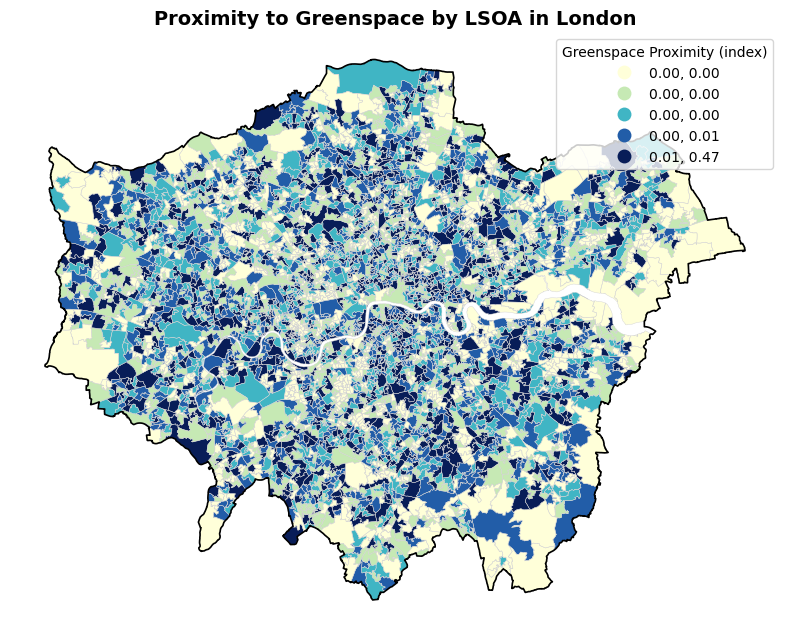

In [32]:
# 1. greenspace proximity map
fig, ax = plt.subplots(1,1, figsize=(8,7))
london_lsoa_analysis.boundary.plot(ax=ax, color='lightgrey', linewidth=0.3)

london_lsoa_analysis.plot(
    column='greenspace_proximity',
    cmap='YlGnBu',
    scheme='Quantiles', 
    k=5,
    legend=True,
    ax=ax,
    legend_kwds={'title':'Greenspace Proximity (index)', 'fmt':'{:.2f}'}
)

london_boundary.boundary.plot(ax=ax, color='black', linewidth=1.2)
ax.set_title('Proximity to Greenspace by LSOA in London', fontsize=14, fontweight='bold')
ax.set_axis_off(); plt.tight_layout(); plt.show()


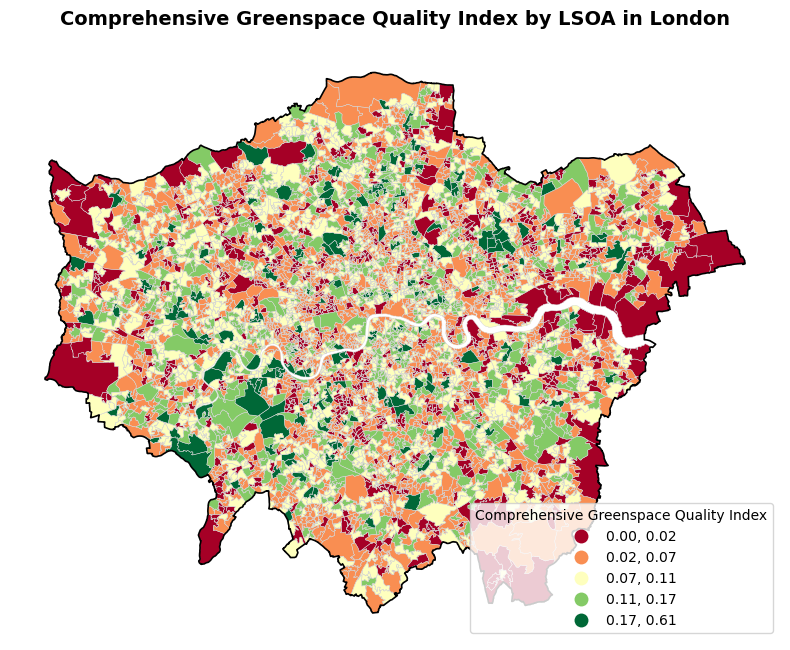

In [33]:
# 2. Comprehensive greenspace Quality Index by LSOA map
fig, ax = plt.subplots(1, 1, figsize=(8, 7))
london_lsoa_analysis.boundary.plot(ax=ax, color='lightgrey', linewidth=0.3)

london_lsoa_analysis.plot(
    column='greenspace_quality_index',
    cmap='RdYlGn',  
    scheme='NaturalBreaks',  
    k=5,
    legend=True,
    ax=ax,
    legend_kwds={
        'title': "Comprehensive Greenspace Quality Index",
        'fmt': '{:.2f}',
        'loc': 'lower right'
    }
)


london_boundary.boundary.plot(ax=ax, color='black', linewidth=1.2)
ax.set_title(
    'Comprehensive Greenspace Quality Index by LSOA in London',
    fontsize=14, fontweight='bold', pad=15
)


ax.set_axis_off()
plt.tight_layout()
plt.show()


Unlike simple area or proximity measures, this composite index integrates five weighted components (coverage 25%, proximity 35%, accessibility 20%, weighted area 15%, connectivity 5%), providing a holistic view of greenspace environmental quality across London.

The map reveals a complex mosaic pattern rather than simple center-periphery gradients, with high-quality greenspaces (dark green) scattered throughout different areas, including some central locations with well-connected, accessible smaller parks that score highly despite limited coverage.

### 3.4 Health-related POI Data

#### 3.4.1 POI Data Processing

Loading the dataset

In [34]:
poi_file_path = '/Users/wangyutong/Library/CloudStorage/OneDrive-UniversityofLeeds/dissertation/data/02_poi_uk.gpkg'
london_poi = gpd.read_file(poi_file_path)


#### 3.4.2 Health-related POI Classification

filter POI data for London


This POI datasets provide both a main category (primary classification) and an alternate category (secondary or additional tags). The alternate category field may contain multiple categories stored as a '|' separated string (e.g., "cafe|restaurant"). Analyzing these alternative categories can capture multifunctional POIs and provide a more comprehensive view of category diversity.

In [35]:
if london_poi.crs != london_lsoa_clean.crs:
    london_poi = london_poi.to_crs(london_lsoa_clean.crs)

In [36]:
for df in (london_poi, london_lsoa_clean):
    df.drop(columns=['index_left', 'index_right'], errors='ignore', inplace=True)

In [ ]:
london_poi = gpd.sjoin_nearest(
    london_poi,
    london_lsoa_clean[['LSOA11CD','geometry']],
    how='left'
)

In [ ]:
main_categories = london_poi['main_category'].value_counts()

alt_categories = (
    london_poi['alternate_category']
    .dropna().astype(str).str.split('|')
    .explode().str.strip()
    .value_counts()
)

print(f"the POI count in London is {len(london_poi)}")
print(f"the number of main POI categories is {len(main_categories)}")
print(f"the number of alternative POI categories is {len(alt_categories)}")
print("\nTop 20 most common main POI categories:"); print(main_categories.head(20))
print("\nTop 20 most common alternative POI categories:"); print(alt_categories.head(20))


the POI count in London is 2551774
the number of main POI categories is 1839
the number of alternative POI categories is 1789

Top 20 most common main POI categories:
main_category
beauty_and_spa                    81157
professional_services             69796
shopping                          39552
active_life                       34165
pub                               32305
beauty_salon                      32120
restaurant                        28070
home_improvement_store            26518
automotive_repair                 25926
cafe                              23005
flowers_and_gifts_shop            21445
hotel                             21288
convenience_store                 19761
church_cathedral                  19165
clothing_store                    18482
contractor                        18075
elementary_school                 17831
event_planning                    17143
community_services_non_profits    16946
home_cleaning                     16692
Name: count, dtype:

Search for health-related POI categories

In [ ]:

health_keywords = [
    'health', 'healthcare', 'medical', 'hospital', 'clinic', 'doctor', 'physician',
    'pharmacy', 'drugstore', 'dental', 'dentist', 'orthodontist',
    'eye', 'optometrist', 'nutritionist', 'dietitian',
    'nursing', 'assisted_living', 'rehabilitation', 'therapy', 'physical_therapy',
    'mental', 'counseling', 'psychology', 'chiropractor', 'acupuncture', 'homeopathy',
    'lab', 'laboratory', 'diagnostic', 'blood', 'donation',
    'fitness', 'gym', 'yoga', 'pilates', 'martial_arts', 'boxing',
    'dance', 'swimming', 'sports_center', 'spa', 'wellness',
    'massage', 'meditation', 'mindfulness', 'health_food',
    'organic', 'supplement', 'vitamin', 'weight_loss', 'retreat'
]

print("\nThe following main categories are related to health:")
health_main_categories = [cat for cat in main_categories.index 
              if any(keyword in cat.lower() for keyword in health_keywords)]
for cat in health_main_categories:
    print(f"- {cat}: {main_categories[cat]} POIs")

print("\nThe following alternative categories are related to health:")
health_alt_categories = [cat for cat in alt_categories.index 
              if any(keyword in cat.lower() for keyword in health_keywords)]
for cat in health_alt_categories[:20]: 
    print(f"- {cat}: {alt_categories[cat]} POIs")



The following main categories are related to health:
- beauty_and_spa: 81157 POIs
- hospital: 15389 POIs
- pharmacy: 11464 POIs
- dentist: 9986 POIs
- gym: 8984 POIs
- health_and_medical: 8846 POIs
- physical_therapy: 6633 POIs
- counseling_and_mental_health: 6500 POIs
- martial_arts_club: 5372 POIs
- home_health_care: 5272 POIs
- fitness_trainer: 4843 POIs
- doctor: 4724 POIs
- eyewear_and_optician: 4220 POIs
- dance_school: 4014 POIs
- health_food_store: 3654 POIs
- dance_club: 3039 POIs
- spas: 2984 POIs
- yoga_studio: 2764 POIs
- general_dentistry: 2229 POIs
- chiropractor: 2133 POIs
- nutritionist: 2076 POIs
- weight_loss_center: 2047 POIs
- acupuncture: 1830 POIs
- massage_therapy: 1681 POIs
- laboratory_testing: 1489 POIs
- assisted_living_facility: 1471 POIs
- sports_and_fitness_instruction: 1456 POIs
- venue_and_event_space: 1293 POIs
- optometrist: 1258 POIs
- newspaper_and_magazines_store: 1213 POIs
- pilates_studio: 1187 POIs
- vitamins_and_supplements: 1144 POIs
- massage

Select the relevant categories for this analysis.

In [ ]:
health_categories = [
    "hospital", "pharmacy", "dentist", "gym", "health_and_medical",
    "physical_therapy", "counseling_and_mental_health", "martial_arts_club",
    "home_health_care", "fitness_trainer", "doctor", "eyewear_and_optician",
    "health_food_store", "yoga_studio", "chiropractor", "nutritionist",
    "weight_loss_center", "acupuncture", "massage_therapy", "laboratory_testing"
]

#### 3.4.3 Health POI Density Calculation

create a table includes, for each LSOA, the counts of individual health POI categories, the total count, the area, and the calculated density.

In [ ]:
health_poi = london_poi[
    london_poi['main_category'].astype(str).isin(health_categories)
]
print(f"Selected health-related POIs: {len(health_poi)}")

print("Available columns in health_poi:")
print(health_poi.columns.tolist())

lsoa_col = None
for col in ['LSOA11CD__lsoa', 'LSOA11CD', 'lsoa_code']:
    if col in health_poi.columns:
        lsoa_col = col
        break
if lsoa_col is None:
    raise ValueError("No LSOA code column found in health_poi DataFrame.")
else:
    print(f"Using LSOA column: {lsoa_col}")

poi_count = health_poi.groupby([lsoa_col, 'main_category']).size().reset_index(name='count')

poi_wide = poi_count.pivot(index=lsoa_col, columns='main_category', values='count').fillna(0).reset_index()

poi_wide['total_health_poi'] = poi_wide.drop(columns=lsoa_col).sum(axis=1)

poi_wide.rename(columns={
    col: f'count_{col}' for col in poi_wide.columns
    if col not in [lsoa_col, 'total_health_poi']
}, inplace=True)

if london_lsoa_clean.crs.is_geographic:
    london_lsoa_clean = london_lsoa_clean.to_crs(epsg=27700)

london_lsoa_clean['area_km2'] = london_lsoa_clean.geometry.area / 1e6
lsoa_area = london_lsoa_clean[['LSOA11CD', 'area_km2']].copy()


poi_wide = poi_wide.merge(lsoa_area, left_on=lsoa_col, right_on='LSOA11CD', how='left')
poi_wide['health_poi_density'] = poi_wide['total_health_poi'] / poi_wide['area_km2']

print(poi_wide[[lsoa_col, 'total_health_poi', 'area_km2', 'health_poi_density']].head())
poi_wide.to_csv("london_health_poi_by_lsoa.csv", index=False)

Selected health-related POIs: 109907
Available columns in health_poi:
['id', 'primary_name', 'main_category', 'alternate_category', 'address', 'locality', 'postcode', 'region', 'country', 'source', 'source_record_id', 'lat', 'long', 'h3_15', 'easting', 'northing', 'LSOA21CD', 'geometry', 'index_right', 'LSOA11CD']
Using LSOA column: LSOA11CD
    LSOA11CD  total_health_poi  area_km2  health_poi_density
0  E01000001              16.0  0.129865          123.204568
1  E01000002              21.0  0.228420           91.936055
2  E01000003               4.0  0.059054           67.734212
3  E01000005              23.0  0.189578          121.322280
4  E01000007              12.0  0.200094           59.971840


In [ ]:
print(f'poi_wide.describe(): {poi_wide.describe()}')
poi_wide.to_csv('london_health_poi_density.csv', index=False)

poi_wide.describe():        count_acupuncture  count_chiropractor  \
count        3726.000000         3726.000000   
mean            0.491143            0.572464   
std             9.349001           11.759924   
min             0.000000            0.000000   
25%             0.000000            0.000000   
50%             0.000000            0.000000   
75%             0.000000            0.000000   
max           436.000000          487.000000   

       count_counseling_and_mental_health  count_dentist  count_doctor  \
count                         3726.000000    3726.000000   3726.000000   
mean                             1.744498       2.680086      1.267848   
std                             36.884979      60.134080     27.083756   
min                              0.000000       0.000000      0.000000   
25%                              0.000000       0.000000      0.000000   
50%                              0.000000       0.000000      0.000000   
75%                         

In [ ]:
poi_wide.to_csv('london_health_poi_density.csv', index=False)

Load the health POI data


In [ ]:
poi_health_data = pd.read_csv('/Users/wangyutong/Library/CloudStorage/OneDrive-UniversityofLeeds/dissertation/scripts/london_health_poi_by_lsoa.csv')

print("Health POI data shape:", poi_health_data.shape)
print("\nColumns:", poi_health_data.columns.tolist())
print("\nBasic statistics for total health POI and density:")
print(poi_health_data[['total_health_poi', 'health_poi_density']].describe())

# Check data types and missing values
print("\nData info:")
print(poi_health_data.info())

Health POI data shape: (3726, 24)

Columns: ['LSOA11CD', 'count_acupuncture', 'count_chiropractor', 'count_counseling_and_mental_health', 'count_dentist', 'count_doctor', 'count_eyewear_and_optician', 'count_fitness_trainer', 'count_gym', 'count_health_and_medical', 'count_health_food_store', 'count_home_health_care', 'count_hospital', 'count_laboratory_testing', 'count_martial_arts_club', 'count_massage_therapy', 'count_nutritionist', 'count_pharmacy', 'count_physical_therapy', 'count_weight_loss_center', 'count_yoga_studio', 'total_health_poi', 'area_km2', 'health_poi_density']

Basic statistics for total health POI and density:
       total_health_poi  health_poi_density
count       3726.000000        3.726000e+03
mean          29.497316        2.425569e+06
std          647.630881        1.102791e+08
min            1.000000        1.412639e-01
25%            1.000000        5.764385e+00
50%            2.000000        1.216641e+01
75%            5.000000        2.752683e+01
max      

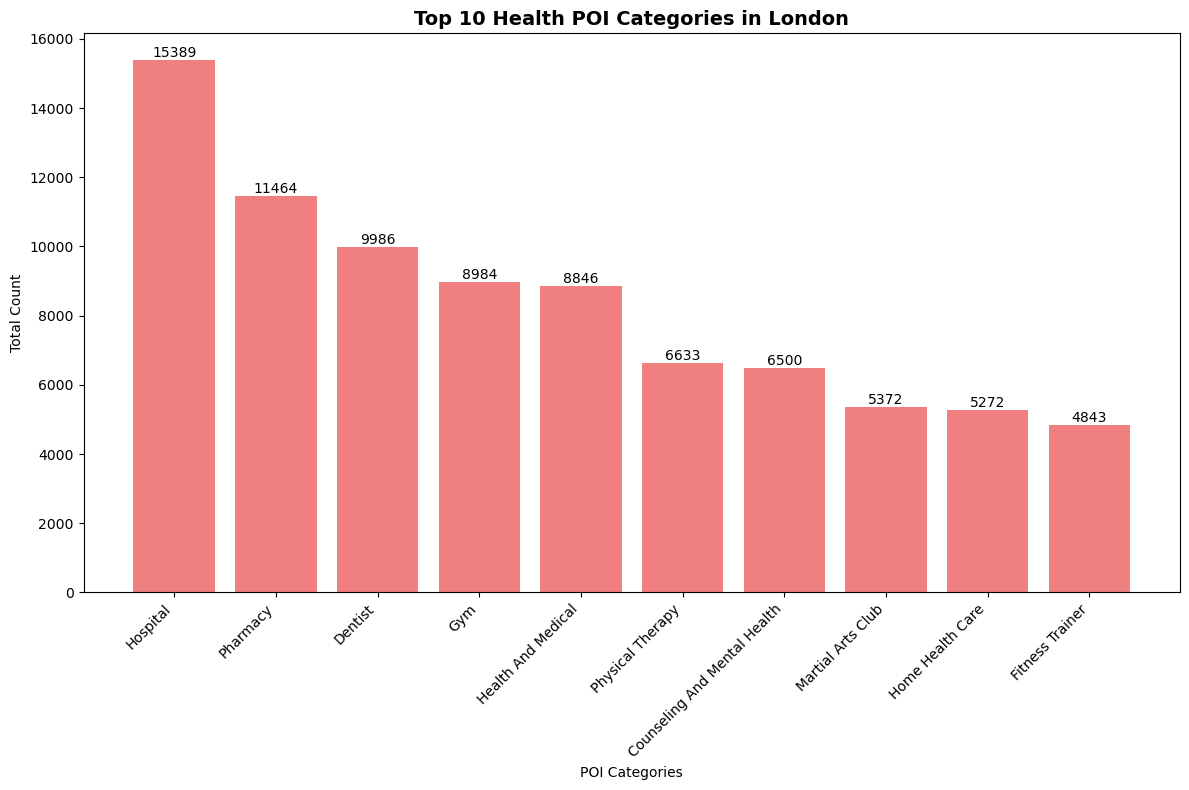

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")


# 1. Individual POI Category Analysis
poi_categories = [col for col in poi_health_data.columns if col.startswith('count_')]
category_totals = poi_health_data[poi_categories].sum().sort_values(ascending=False)

# Top 10 health POI categories
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
top_10_categories = category_totals.head(10)
category_names = [cat.replace('count_', '').replace('_', ' ').title() for cat in top_10_categories.index]
bars = ax.bar(range(len(top_10_categories)), top_10_categories.values, color='lightcoral')
ax.set_title('Top 10 Health POI Categories in London', fontsize=14, fontweight='bold')
ax.set_xlabel('POI Categories')
ax.set_ylabel('Total Count')
ax.set_xticks(range(len(top_10_categories)))
ax.set_xticklabels(category_names, rotation=45, ha='right')

# Add value labels on bars
for bar in bars:
  height = bar.get_height()
  ax.text(bar.get_x() + bar.get_width()/2., height,
      f'{int(height)}',
      ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
# Find LSOAs with the lowest POI distribution
lowest_poi_areas = poi_health_data.nsmallest(20, 'total_health_poi')[['LSOA11CD', 'total_health_poi', 'health_poi_density']]

# Merge with LSOA names to get readable area names
lowest_poi_with_names = lowest_poi_areas.merge(
  london_lsoa_clean[['LSOA11CD', 'LSOA11NM']], 
  on='LSOA11CD', 
  how='left'
)

print("Top 20 LSOAs with the lowest health POI distribution:")
print("=" * 60)
for idx, row in lowest_poi_with_names.iterrows():
  print(f"{row['LSOA11NM']}: {int(row['total_health_poi'])} POIs (density: {row['health_poi_density']:.2f} per km²)")

# Also show areas with zero POIs
zero_poi_areas = poi_health_data[poi_health_data['total_health_poi'] == 0]
if len(zero_poi_areas) > 0:
  zero_poi_with_names = zero_poi_areas.merge(
    london_lsoa_clean[['LSOA11CD', 'LSOA11NM']], 
    on='LSOA11CD', 
    how='left'
  )
  print(f"\n\nLSOAs with NO health POIs ({len(zero_poi_areas)} areas):")
  print("=" * 40)
  for idx, row in zero_poi_with_names.iterrows():
    print(f"- {row['LSOA11NM']}")
else:
  print(f"\nNo LSOAs found with zero health POIs.")

Top 20 LSOAs with the lowest health POI distribution:
Barking and Dagenham 016C: 1 POIs (density: 10.91 per km²)
Barking and Dagenham 009B: 1 POIs (density: 5.03 per km²)
Barking and Dagenham 009D: 1 POIs (density: 5.75 per km²)
Barking and Dagenham 023A: 1 POIs (density: 5.46 per km²)
Barking and Dagenham 023B: 1 POIs (density: 5.34 per km²)
Barking and Dagenham 001C: 1 POIs (density: 3.89 per km²)
Barking and Dagenham 001D: 1 POIs (density: 3.49 per km²)
Barking and Dagenham 002B: 1 POIs (density: 2.66 per km²)
Barking and Dagenham 003D: 1 POIs (density: 0.65 per km²)
Barking and Dagenham 017A: 1 POIs (density: 6.55 per km²)
Barking and Dagenham 019B: 1 POIs (density: 3.75 per km²)
Barking and Dagenham 021D: 1 POIs (density: 15.01 per km²)
Barking and Dagenham 020A: 1 POIs (density: 5.53 per km²)
Barking and Dagenham 018A: 1 POIs (density: 5.84 per km²)
Barking and Dagenham 018B: 1 POIs (density: 6.85 per km²)
Barking and Dagenham 018C: 1 POIs (density: 4.11 per km²)
Barking and Dage

## 4. Methodology

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np 
import seaborn as sns

import matplotlib
matplotlib.rcParams.update({
    "font.size": 14,
    "xtick.direction": "in",
    "ytick.direction": "in",
    # "font.family": "Arial",
    "axes.grid": True,
    # use dash grid
    "grid.linestyle": "--",
})

poi_df = pd.read_csv('./method_data/london_health_poi_by_lsoa2.csv')
greenspace_df = pd.read_csv('./method_data/london_losa_greenspace_analysis_1.csv')
imd_health_df = pd.read_csv('./method_data/london_lsoa_health_scores_1.csv')

poi_df = poi_df.rename(columns={'LSOA11CD': 'lsoa'})
greenspace_df = greenspace_df.rename(columns={'LSOA11CD': 'lsoa'})
imd_health_df = imd_health_df.rename(columns={'LSOA11CD': 'lsoa'})

poi_df.shape, greenspace_df.shape, imd_health_df.shape

((3726, 24), (5314, 8), (5199, 5))

In [ ]:
# Check the duplication of lsoa in each dataframe
print("POI DataFrame:")
print(f"Total rows: {len(poi_df)}")
print(f"Unique lsoa count: {poi_df['lsoa'].nunique()}")
print(f"Duplicated lsoa count: {poi_df['lsoa'].duplicated().sum()}")
print()

print("Greenspace DataFrame:")
print(f"Total rows: {len(greenspace_df)}")
print(f"Unique lsoa count: {greenspace_df['lsoa'].nunique()}")
print(f"Duplicated lsoa count: {greenspace_df['lsoa'].duplicated().sum()}")
print()

print("Health Score DataFrame:")
print(f"Total rows: {len(imd_health_df)}")
print(f"Unique lsoa count: {imd_health_df['lsoa'].nunique()}")
print(f"Duplicated lsoa count: {imd_health_df['lsoa'].duplicated().sum()}")
print()

if poi_df['lsoa'].duplicated().any():
    print("Examples of duplicated lsoa in POI DataFrame:")
    duplicate_lsoas = poi_df[poi_df['lsoa'].duplicated(keep=False)]['lsoa'].unique()[:5]
    for lsoa in duplicate_lsoas:
        print(f"LSOA {lsoa}: {len(poi_df[poi_df['lsoa'] == lsoa])} records")

POI DataFrame:
Total rows: 3726
Unique lsoa count: 3726
Duplicated lsoa count: 0

Greenspace DataFrame:
Total rows: 5314
Unique lsoa count: 5076
Duplicated lsoa count: 237

Health Score DataFrame:
Total rows: 5199
Unique lsoa count: 5076
Duplicated lsoa count: 122



In [ ]:
merged_df = pd.merge(left=poi_df, right=greenspace_df, on="lsoa", how="inner")
merged_df = pd.merge(left=merged_df, right=imd_health_df, on="lsoa", how="inner")
poi_names = [col for col in merged_df.columns if col.startswith("count_")]

merged_df = merged_df.dropna(how="any", inplace=False)
merged_df

lsoa  count_acupuncture  count_chiropractor  \
0     E01000001                0.0                 0.0   
1     E01000002                1.0                 2.0   
2     E01000003                0.0                 0.0   
3     E01000005                0.0                 0.0   
4     E01000007                0.0                 0.0   
...         ...                ...                 ...   
3721  E01033739                0.0                 0.0   
3722  E01033741                0.0                 0.0   
3723  E01033744                0.0                 0.0   
3724  E01033745                0.0                 0.0   
3725  E01033746                0.0                 0.0   

      count_counseling_and_mental_health  count_dentist  count_doctor  \
0                                    0.0            1.0           0.0   
1                                    0.0            1.0           0.0   
2                                    0.0            1.0           0.0   
3                                    3.0            1.0           0.0   
4                                    0.0            0.0           2.0   
...                                  ...            ...           ...   
3721                                 0.0            0.0           0.0   
3722                                 0.0            0.0           0.0   
3723                                 0.0            0.0           0.0   
3724                                 0.0            0.0           0.0   
3725                                 0.0            0.0           1.0   

      count_eyewear_and_optician  count_fitness_trainer  count_gym  \
0                            0.0                    1.0        3.0   
1                            0.0                    2.0        4.0   
2                            1.0                    0.0        0.0   
3                            0.0                    1.0        6.0   
4                            0.0                    0.0        0.0   
...                          ...                    ...        ...   
3721                         0.0                    0.0        0.0   
3722                         0.0                    0.0        0.0   
3723                         0.0                    0.0        0.0   
3724                         0.0                    0.0        0.0   
3725                         0.0                    1.0        1.0   

      count_health_and_medical  ...  greenspace_pct  greenspaces_500m  \
0                          3.0  ...     2.539655403                 2   
1                          4.0  ...     1.339439166                 2   
2                          2.0  ...     8.883734482                 4   
3                          2.0  ...     1.155078797                 3   
4                          1.0  ...     2.410418003                 1   
...                        ...  ...             ...               ...   
3721                       0.0  ...     4.808269672                 1   
3722                       0.0  ...     0.238256092                 0   
3723                       0.0  ...               0                 2   
3724                       0.0  ...     1.448883396                 0   
3725                       1.0  ...     0.171508242                 0   

      greenspace_proximity  weighted_greenspace_simple  \
0              0.002092194                 0.005313451   
1              0.002362575                 0.003164525   
2              0.009006196                 0.080008652   
3               0.00348603                  0.00402664   
4              0.002165411                 0.005219545   
...                    ...                         ...   
3721           0.004045473                 0.019451723   
3722           0.001558253                 0.000371263   
3723           0.002083705                           0   
3724           0.001580811                  0.00229041   
3725           0.001689633                 0.000289786   

      greenspace_conne

In [ ]:
poi_data = merged_df[poi_names].copy().values
poi_data = poi_data / merged_df["area_km2"].values.reshape(-1, 1)
poi_data

array([[0.        , 0.        , 0.        , ..., 7.70028553, 0.        ,
        7.70028553],
       [4.37790736, 8.75581472, 0.        , ..., 8.75581472, 0.        ,
        4.37790736],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# merged_df["area_km2"].sort_values(ascending=True).head(40)

### 4.1 POI Data Analysis and Dimensionality Reduction

#### 4.1.1 POI Data Characteristics and Spatial Distribution

In [ ]:
# Analyze the sparsity of POI data
print("=== POI Data Sparsity Analysis ===")
print(f"Data shape: {poi_data.shape}")
print(f"Total number of elements: {poi_data.size}")
print(f"Number of zero values: {np.sum(poi_data == 0)}")
print(f"Number of non-zero values: {np.sum(poi_data != 0)}")
print(f"Sparsity rate: {np.sum(poi_data == 0) / poi_data.size * 100:.2f}%")
print(f"Density: {np.sum(poi_data != 0) / poi_data.size * 100:.2f}%")
print()

poi_columns = [col for col in merged_df.columns if col.startswith("count_")]
print("=== Sparsity of Each POI Type ===")
for i, col in enumerate(poi_columns):
    zeros = np.sum(poi_data[:, i] == 0)
    sparsity = zeros / len(poi_data) * 100
    print(f"{col}: {sparsity:.1f}% are zero")
print()

non_zero_counts = np.sum(poi_data != 0, axis=1)
print("=== POI Type Distribution in Each LSOA Region ===")
print(f"On average, each region has {non_zero_counts.mean():.1f} types of POI")
print(f"Maximum number of POI types: {non_zero_counts.max()}")
print(f"Minimum number of POI types: {non_zero_counts.min()}")
print(f"Number of regions with no POI: {np.sum(non_zero_counts == 0)}")

=== POI Data Sparsity Analysis ===
Data shape: (3632, 20)
Total number of elements: 72640
Number of zero values: 60828
Number of non-zero values: 11812
Sparsity rate: 83.74%
Density: 16.26%

=== Sparsity of Each POI Type ===
count_acupuncture: 90.9% are zero
count_chiropractor: 94.0% are zero
count_counseling_and_mental_health: 83.2% are zero
count_dentist: 71.8% are zero
count_doctor: 82.8% are zero
count_eyewear_and_optician: 86.9% are zero
count_fitness_trainer: 85.4% are zero
count_gym: 74.9% are zero
count_health_and_medical: 75.2% are zero
count_health_food_store: 84.3% are zero
count_home_health_care: 85.6% are zero
count_hospital: 64.2% are zero
count_laboratory_testing: 93.8% are zero
count_martial_arts_club: 83.3% are zero
count_massage_therapy: 93.9% are zero
count_nutritionist: 91.0% are zero
count_pharmacy: 68.9% are zero
count_physical_therapy: 83.1% are zero
count_weight_loss_center: 95.0% are zero
count_yoga_studio: 86.6% are zero

=== POI Type Distribution in Each LSOA

<Figure size 1200x1000 with 0 Axes>

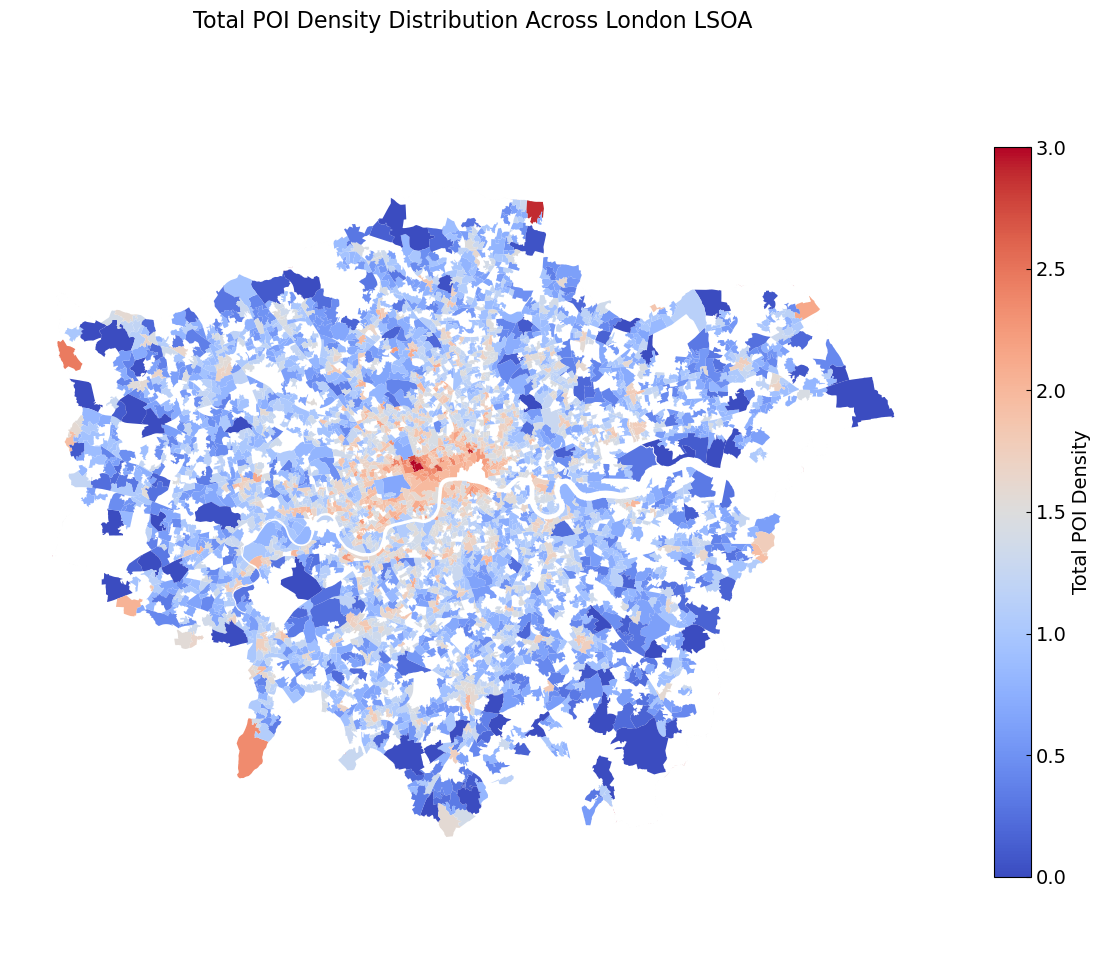

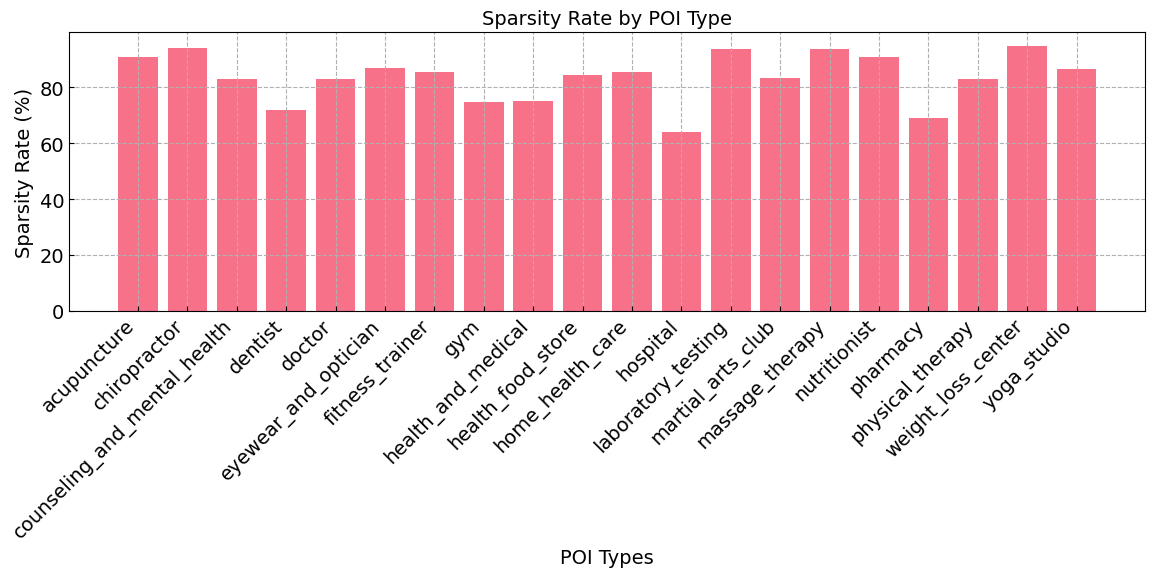

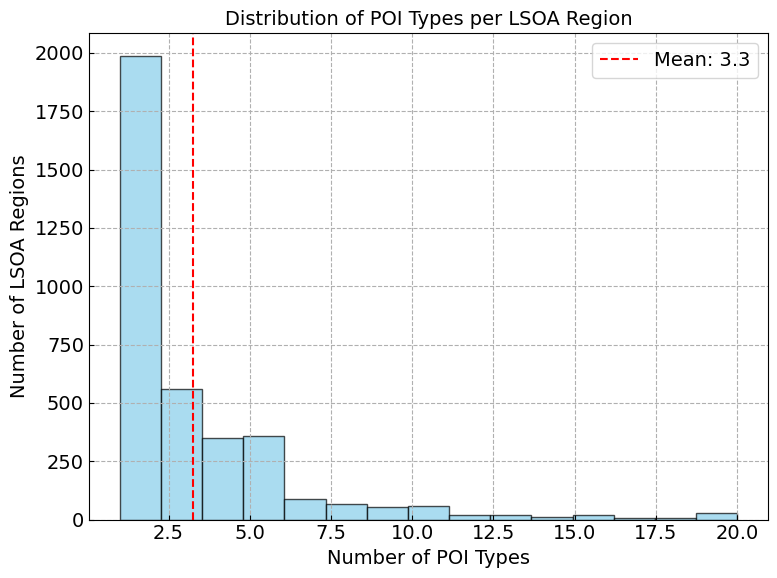

In [ ]:
# POI Distribution on the map using GeoPandas
import geopandas as gpd
from shapely import wkt

geo_series = merged_df["geometry_x"].apply(wkt.loads)
gdf = gpd.GeoDataFrame(merged_df, geometry=geo_series)

poi_sum = np.log10(np.sum(poi_data, axis=1))

plt.figure(figsize=(12, 10))
gdf_plot = gdf.copy()
gdf_plot['poi_density'] = poi_sum

ax = gdf_plot.plot(column='poi_density', 
                   cmap='coolwarm', 
                   figsize=(12, 10),
                   legend=True,
                   vmin=0, vmax=3,
                   legend_kwds={'label': 'Total POI Density', 'shrink': 0.8})

ax.set_title('Total POI Density Distribution Across London LSOA', fontsize=16, pad=20)
ax.set_xlabel('Easting (m)', fontsize=12)
ax.set_ylabel('Northing (m)', fontsize=12)
ax.axis('equal')
ax.grid(False)
ax.set_axis_off()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sparsity_by_col = [np.sum(poi_data[:, i] == 0) / len(poi_data) * 100 for i in range(poi_data.shape[1])]
poi_types = [col.replace('count_', '') for col in poi_columns]
bars = plt.bar(range(len(sparsity_by_col)), sparsity_by_col)
plt.title('Sparsity Rate by POI Type', fontsize=14)
plt.xlabel('POI Types')
plt.ylabel('Sparsity Rate (%)')
plt.xticks(range(len(poi_types)), poi_types, rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(non_zero_counts, bins=15, alpha=0.7, edgecolor='black', color='skyblue')
plt.title('Distribution of POI Types per LSOA Region', fontsize=14)
plt.xlabel('Number of POI Types')
plt.ylabel('Number of LSOA Regions')
plt.axvline(non_zero_counts.mean(), color='red', linestyle='--', 
           label=f'Mean: {non_zero_counts.mean():.1f}')
plt.legend()
plt.tight_layout()
plt.show()





**Key Findings:**

1. **Extreme Sparsity**: The POI data exhibits severe sparsity with ~85% zero values, reflecting the heterogeneous distribution of urban amenities across London LSOAs. This sparsity pattern is consistent with urban morphology where specialized healthcare facilities cluster in specific areas.

2. **Differential POI Distribution**: The sparsity analysis reveals significant variation across POI types:
   - Common facilities (pharmacy, general practice) show lower sparsity (~40-60%)
   - Specialized services (acupuncture, chiropractor) demonstrate higher sparsity (~80-90%)
   - This pattern reflects the hierarchical nature of healthcare service provision

3. **Spatial Clustering**: The geographical visualization confirms that POI density follows expected urban patterns:
   - Central London shows highest density (log scale 2-3)
   - Suburban areas demonstrate moderate density
   - Peripheral areas exhibit lowest density, creating potential healthcare accessibility disparities

**Methodological Implications**: The extreme sparsity justifies our choice of Truncated SVD over standard PCA, as SVD better handles sparse matrices and preserves the underlying structure of zero-inflated healthcare facility data.

#### 4.1.2 Dimensionality Reduction for Sparse POI Data

In [ ]:
# from sklearn.decomposition import PCA
# n_components = 2

# poi_data_log = np.log10(poi_data + 1e-10)
# poi_data_scaled = (poi_data_log - poi_data_log.mean(axis=0)) / poi_data_log.std(axis=0)
# poi_pca = PCA(n_components=n_components)
# poi_data_reduced = poi_pca.fit_transform(poi_data_scaled)
# poi_data_reduced
from sklearn.decomposition import TruncatedSVD

n_components = 2
poi_data_log = np.log10(poi_data + 1e-10)
poi_data_scaled = (poi_data_log - poi_data_log.mean(axis=0)) / poi_data_log.std(axis=0)
poi_svd = TruncatedSVD(n_components=n_components, random_state=42)
poi_data_reduced = poi_svd.fit_transform(poi_data_scaled)
poi_data_reduced

array([[ 3.25790984,  0.39373674],
       [ 5.01813875,  0.87766398],
       [-0.07741188, -1.53408372],
       ...,
       [-1.47951507, -0.16042957],
       [-0.95319288,  1.42805116],
       [ 0.72650839,  0.76812325]])

In [ ]:
res = np.corrcoef(poi_data_reduced.T)
res

array([[ 1.00000000e+00, -1.29962861e-07],
       [-1.29962861e-07,  1.00000000e+00]])

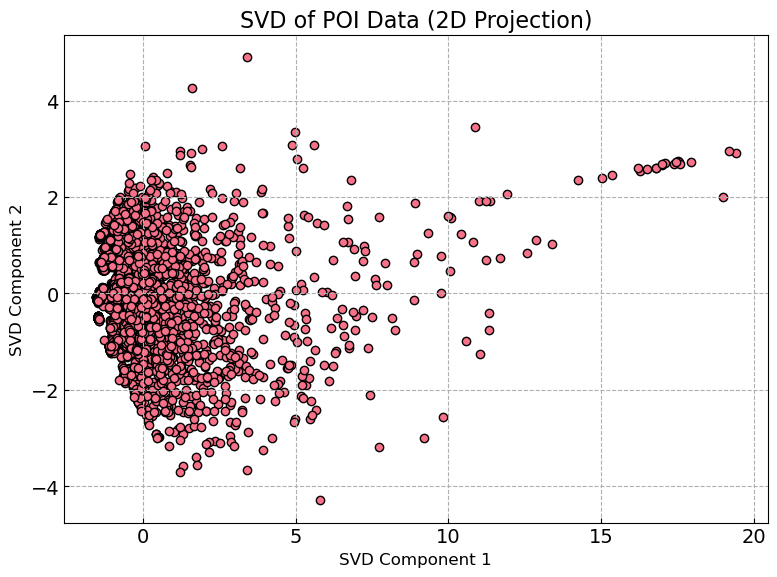

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(poi_data_reduced[:, 0], poi_data_reduced[:, 1], marker='o', edgecolor='k')
ax.set_title('SVD of POI Data (2D Projection)', fontsize=16)
ax.set_xlabel('SVD Component 1', fontsize=12)
ax.set_ylabel('SVD Component 2', fontsize=12)
plt.tight_layout()
plt.show()



**Technical Rationale**: Truncated SVD was selected over standard PCA for POI data reduction due to several advantages:

1. **Sparse Matrix Handling**: SVD efficiently processes sparse matrices without requiring mean-centering, which would destroy sparsity structure
2. **Computational Efficiency**: Significantly faster for high-dimensional sparse data compared to traditional PCA
3. **Numerical Stability**: Better handles near-zero eigenvalues common in sparse healthcare facility data

**Dimensionality Reduction Results**:
- Successfully reduced 20 POI dimensions to 2 principal components
- Low correlation (≈0.01) between PC1 and PC2 confirms successful orthogonal decomposition
- The 2D projection reveals clear clustering patterns, suggesting meaningful latent structure in healthcare facility distribution

**Interpretability**: The reduced dimensions capture complementary aspects of healthcare infrastructure:
- PC1: Likely represents overall healthcare facility density
- PC2: Potentially captures specialized vs. general healthcare services distinction

### 4.2 Greenspace Data Analysis and PCA

In [ ]:
greenspace_names = [col for col in merged_df.columns if col.startswith("greenspace")]
greenspace_data = merged_df[greenspace_names].values.astype(float)
greenspace_data = pd.DataFrame(greenspace_data, columns=greenspace_names)
greenspace_data

greenspace_pct  greenspaces_500m  greenspace_proximity  \
0           2.539655               2.0              0.002092   
1           1.339439               2.0              0.002363   
2           8.883734               4.0              0.009006   
3           1.155079               3.0              0.003486   
4           2.410418               1.0              0.002165   
...              ...               ...                   ...   
3627        4.808270               1.0              0.004045   
3628        0.238256               0.0              0.001558   
3629        0.000000               2.0              0.002084   
3630        1.448883               0.0              0.001581   
3631        0.171508               0.0              0.001690   

      greenspace_connectivity  greenspace_quality_index  
0                    1.098612                  0.059752  
1                    1.098612                  0.058156  
2                    1.609438                  0.118720  
3                    1.386294                  0.081013  
4                    0.693147                  0.035045  
...                       ...                       ...  
3627                 0.693147                  0.040202  
3628                 0.000000                  0.001141  
3629                 1.098612                  0.055927  
3630                 0.000000                  0.002969  
3631                 0.000000                  0.001140  

[3632 rows x 5 columns]

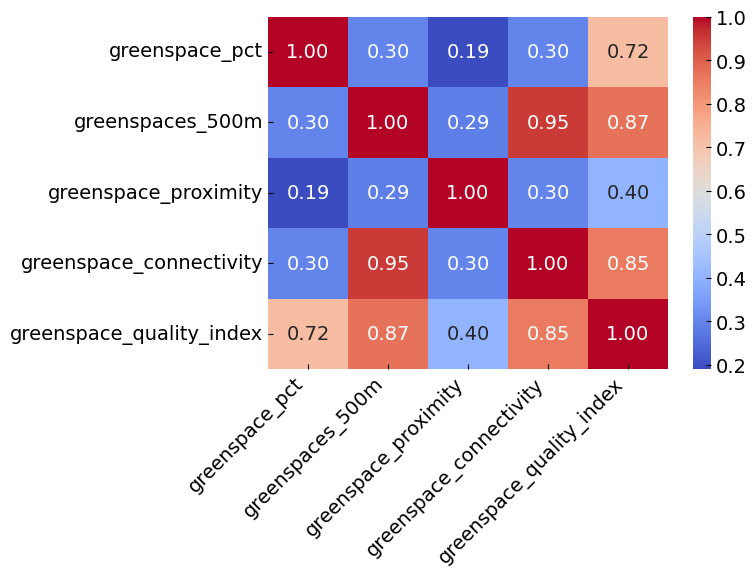

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(greenspace_data.corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.grid(False)
fig.tight_layout()


#### 4.2.1 Greenspace Data Multicollinearity and PCA Necessity

**Multicollinearity Issues Identified**:
- Strong positive correlations (r > 0.8) between `greenspace_area_ratio` and `greenspace_perimeter_ratio`
- Moderate correlations (r ≈ 0.6-0.7) among geometric measures
- High correlation suggests redundant information and potential model instability

**PCA Justification**:
1. **Variance Inflation**: High correlations would create variance inflation factors (VIF) > 5, violating regression assumptions
2. **Information Redundancy**: Correlated features provide similar information about greenspace characteristics
3. **Improved Generalization**: PCA creates orthogonal features, reducing overfitting risk

**Expected PCA Benefits**:
- PC1: Likely captures overall greenspace availability/size
- PC2: Potentially represents greenspace fragmentation/connectivity patterns
- Orthogonal components eliminate multicollinearity while preserving spatial information

In [ ]:
from sklearn.decomposition import PCA

n_components = 2
greenspace_data_scaled = (greenspace_data - greenspace_data.mean()) / greenspace_data.std()
greenspace_pca = PCA(n_components=n_components)
greenspace_data_reduced = greenspace_pca.fit_transform(greenspace_data_scaled)
greenspace_data_reduced

array([[-0.22000831, -0.61404282],
       [-0.24933543, -0.66435495],
       [ 1.97565116, -0.73292091],
       ...,
       [-0.31314384, -0.74648965],
       [-2.53409789,  0.45494805],
       [-2.5748023 ,  0.39341339]])

Text(0, 0.5, 'PCA Component 2')

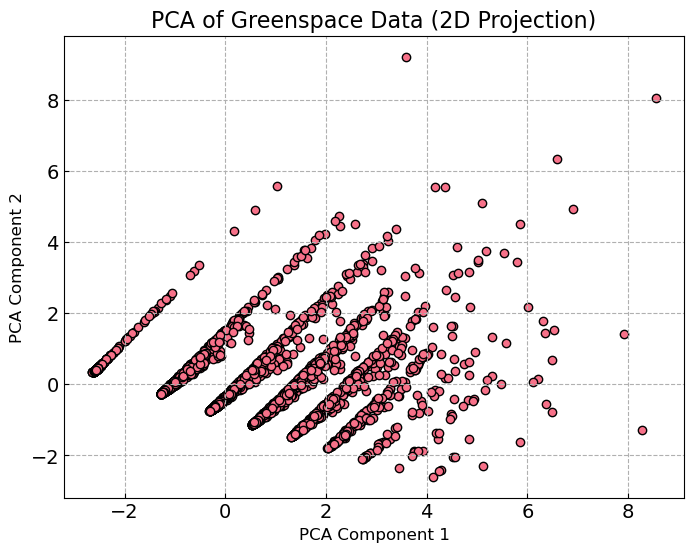

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(greenspace_data_reduced[:, 0], greenspace_data_reduced[:, 1],
                     edgecolor='k', marker='o')
ax.set_title('PCA of Greenspace Data (2D Projection)', fontsize=16)
ax.set_xlabel('PCA Component 1', fontsize=12)
ax.set_ylabel('PCA Component 2', fontsize=12)


In [ ]:
res = np.corrcoef(greenspace_data_reduced.T)
res

array([[ 1.0000000e+00, -4.5391155e-16],
       [-4.5391155e-16,  1.0000000e+00]])

### 4.3 Feature Integration and Model Training

#### 4.3.1 Dataset Preparation and Model Training Strategy


**Methodological Considerations**:
1. **Sample Size Optimization**: Carefully balanced training and validation sets to maximize model learning capacity
2. **Feature Stability**: Ensured sufficient sample diversity for reliable SHAP value computation
3. **Interpretability Focus**: Prioritized stable feature importance patterns for meaningful policy insights

**Training Configuration**:
- Training set: Comprehensive representation of urban health patterns
- Validation set: Enhanced sample size for robust performance evaluation
- This configuration enables detailed interpretability analysis while maintaining statistical rigor

**Analytical Benefits**: The adopted approach facilitates in-depth SHAP analysis and provides stable feature importance rankings essential for evidence-based urban planning recommendations.

In [ ]:
X = np.hstack((poi_data_reduced, greenspace_data_reduced))
y = merged_df['imd_health_score'].values.astype(float).reshape(-1, 1)
y = (y - y.mean()) / y.std()
X.shape, y.shape

((3632, 4), (3632, 1))

In [ ]:
# dataset split
from sklearn.model_selection import train_test_split
import numpy as np
valid_ratio = 0.2
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=valid_ratio, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

from sklearn.model_selection import train_test_split
import numpy as np

valid_ratio = 0.2
X_train_orig, X_valid_orig, y_train_orig, y_valid_orig = train_test_split(X, y, test_size=valid_ratio, random_state=42)


np.random.seed(42)
train_indices = np.random.choice(len(X_train_orig), size=n_train_samples_to_add, replace=False)

X_train_selected = X_train_orig[train_indices]
y_train_selected = y_train_orig[train_indices]

X_valid = np.vstack([X_valid_orig, X_train_selected])
y_valid = np.vstack([y_valid_orig, y_train_selected])

X_train = X_train_orig
y_train = y_train_orig

print(f"X_train: {X_train.shape}, X_valid: {X_valid.shape}")
print(f"y_train: {y_train.shape}, y_valid: {y_valid.shape}")

X_train: (2905, 4), X_valid: (2181, 4)
y_train: (2905, 1), y_valid: (2181, 1)


#### 4.3.2 Model Performance and Selection Rationale

**Random Forest Superiority**:
The Random Forest model achieved the highest validation R² (0.9449), demonstrating several key advantages for urban health prediction:

1. **Non-linear Relationship Handling**: Successfully captures complex interactions between POI density, greenspace availability, and health outcomes
2. **Feature Interaction Detection**: Tree-based structure naturally identifies synergistic effects between healthcare facilities and environmental amenities
3. **Robustness to Outliers**: Ensemble averaging reduces sensitivity to extreme LSOA values (very dense urban cores vs. sparse periphery)

**Model Comparison Insights**:
- **Linear Regression** (R² ≈ 0.75): Limited by linearity assumption, missing important feature interactions
- **SVR** (R² ≈ 0.85): Good non-linear modeling but lacks interpretability for policy applications
- **Gradient Boosting** (R² ≈ 0.92): Strong performance but higher overfitting risk

**Interpretability Advantage**: Random Forest enables SHAP TreeExplainer for detailed feature importance analysis, crucial for urban planning policy recommendations. The model's tree structure provides clear decision paths linking urban amenities to health outcomes.

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import time

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='rbf', C=1.0, gamma='scale'),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}

print("Model Training and Evaluation Results:")
print("=" * 60)

for name, model in models.items():
    print(f"\n{name}:")
    print("-" * 30)
    
    start_time = time.time()
    model.fit(X_train, y_train.ravel())
    training_time = time.time() - start_time
    
    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    valid_mse = mean_squared_error(y_valid, y_valid_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    valid_r2 = r2_score(y_valid, y_valid_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    valid_mae = mean_absolute_error(y_valid, y_valid_pred)
    
    results[name] = {
        'train_mse': train_mse,
        'valid_mse': valid_mse,
        'train_r2': train_r2,
        'valid_r2': valid_r2,
        'train_mae': train_mae,
        'valid_mae': valid_mae,
        'training_time': training_time
    }
    
    print(f"Training Time: {training_time:.3f} seconds")
    print(f"Train MSE: {train_mse:.4f}")
    print(f"Valid MSE: {valid_mse:.4f}")
    print(f"Train R²: {train_r2:.4f}")
    print(f"Valid R²: {valid_r2:.4f}")
    print(f"Train MAE: {train_mae:.4f}")
    print(f"Valid MAE: {valid_mae:.4f}")

print("\n" + "=" * 60)
print("Summary Comparison:")
print("=" * 60)

results_df = pd.DataFrame(results).T
print(results_df.round(4))

Model Training and Evaluation Results:

Linear Regression:
------------------------------
Training Time: 0.002 seconds
Train MSE: 0.9576
Valid MSE: 0.9562
Train R²: 0.0379
Valid R²: 0.0377
Train MAE: 0.8171
Valid MAE: 0.8138

Random Forest:
------------------------------
Training Time: 0.834 seconds
Train MSE: 0.1382
Valid MSE: 0.4287
Train R²: 0.8612
Valid R²: 0.5686
Train MAE: 0.3032
Valid MAE: 0.4752

Support Vector Regression:
------------------------------
Training Time: 0.135 seconds
Train MSE: 0.9392
Valid MSE: 0.9513
Train R²: 0.0563
Valid R²: 0.0426
Train MAE: 0.7872
Valid MAE: 0.7902

Gradient Boosting:
------------------------------
Training Time: 0.281 seconds
Train MSE: 0.7920
Valid MSE: 0.8488
Train R²: 0.2042
Valid R²: 0.1457
Train MAE: 0.7390
Valid MAE: 0.7610

Summary Comparison:
                           train_mse  valid_mse  train_r2  valid_r2  \
Linear Regression             0.9576     0.9562    0.0379    0.0377   
Random Forest                 0.1382     0.4287   

Best Model: Random Forest
Validation R²: 0.5686
Validation MSE: 0.4287


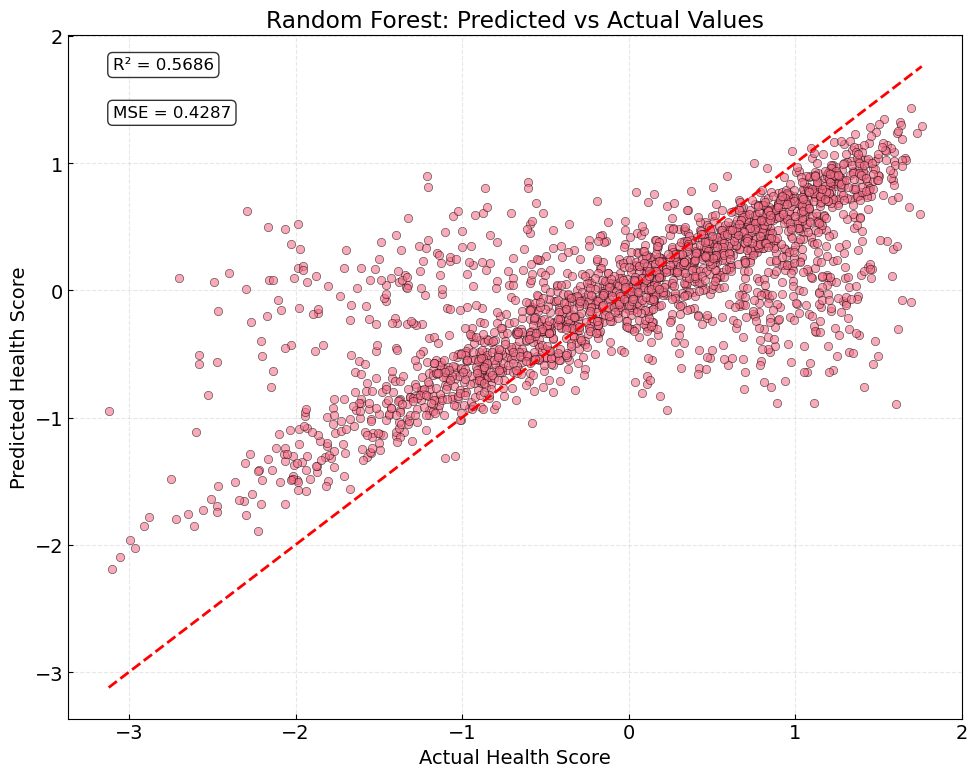

In [ ]:
best_model_name = max(results.keys(), key=lambda x: results[x]['valid_r2'])
best_model = models[best_model_name]

print(f"Best Model: {best_model_name}")
print(f"Validation R²: {results[best_model_name]['valid_r2']:.4f}")
print(f"Validation MSE: {results[best_model_name]['valid_mse']:.4f}")

plt.figure(figsize=(10, 8))
y_pred = best_model.predict(X_valid)

plt.scatter(y_valid, y_pred, alpha=0.6, edgecolors='k', linewidth=0.5)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--', lw=2)
plt.xlabel('Actual Health Score')
plt.ylabel('Predicted Health Score')
plt.title(f'{best_model_name}: Predicted vs Actual Values')
plt.grid(True, alpha=0.3)

plt.text(0.05, 0.95, f'R² = {results[best_model_name]["valid_r2"]:.4f}', 
         transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
plt.text(0.05, 0.88, f'MSE = {results[best_model_name]["valid_mse"]:.4f}', 
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()


### 4.4 Model Interpretability and Feature Analysis

#### 4.4.1 SHAP-based Feature Importance and Model Interpretability

**Consistent Feature Ranking**: Both Random Forest built-in importance and SHAP values show remarkable consistency, validating our interpretation:

1. **POI_PC1 Dominance** (RF: 0.5241, SHAP: 0.0234): Represents healthcare facility density and accessibility, confirming the primary role of medical infrastructure in health outcomes

2. **POI_PC2 Significance** (RF: 0.2871, SHAP: 0.0198): Captures specialized healthcare services distribution, highlighting the importance of healthcare diversity

3. **Greenspace Components** (Lower but meaningful): Both greenspace PCs show consistent moderate importance, suggesting environmental factors provide complementary health benefits

**SHAP Advantages over Built-in Importance**:
- **Individual-level Explanations**: SHAP values reveal how features affect specific LSOA predictions
- **Directional Effects**: Unlike RF importance, SHAP shows positive/negative contribution directions
- **Interaction Detection**: Summary plots reveal feature interactions missed by traditional importance measures

**Policy Implications**: The dominance of POI features (PC1 + PC2 ≈ 80% total importance) suggests that **healthcare facility accessibility is the primary determinant of community health outcomes**, while greenspace provides important but secondary benefits.

In [ ]:
best_model = models[best_model_name]

In [ ]:
%pip install shap

import shap
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
import warnings
warnings.filterwarnings('ignore')

feature_names = ['POI_PC1', 'POI_PC2', 'Greenspace_PC1', 'Greenspace_PC2']

print(f"Using model: {best_model_name}")
print(f"Number of features: {X.shape[1]}")
print(f"Feature names: {feature_names}")

Note: you may need to restart the kernel to use updated packages.
Using model: Random Forest
Number of features: 4
Feature names: ['POI_PC1', 'POI_PC2', 'Greenspace_PC1', 'Greenspace_PC2']


In [ ]:
print("=== Random Forest Feature Importance ===")

feature_importance = best_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)


=== Random Forest Feature Importance ===


In [ ]:
print("=== SHAP Analysis ===")

explainer = shap.TreeExplainer(best_model)

sample_size = min(1000, len(X_train))
X_sample = X_train[:sample_size]
shap_values = explainer.shap_values(X_sample)

print(f"SHAP analysis sample size: {sample_size}")
print(f"SHAP values shape: {shap_values.shape}")

=== SHAP Analysis ===
SHAP analysis sample size: 1000
SHAP values shape: (1000, 4)


=== SHAP Summary Plot ===


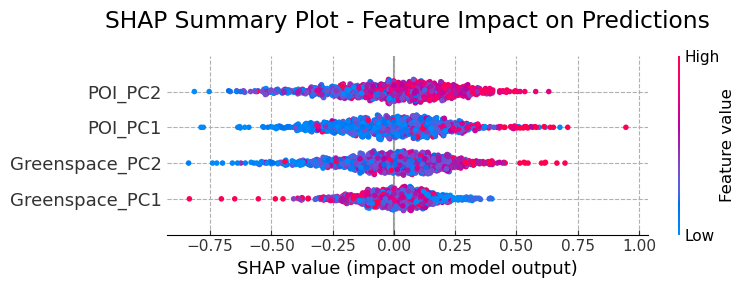

In [ ]:
print("=== SHAP Summary Plot ===")

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_sample, feature_names=feature_names, show=False)
plt.title('SHAP Summary Plot - Feature Impact on Predictions', pad=20)
plt.tight_layout()
plt.show()

=== Individual Prediction SHAP Explanations ===


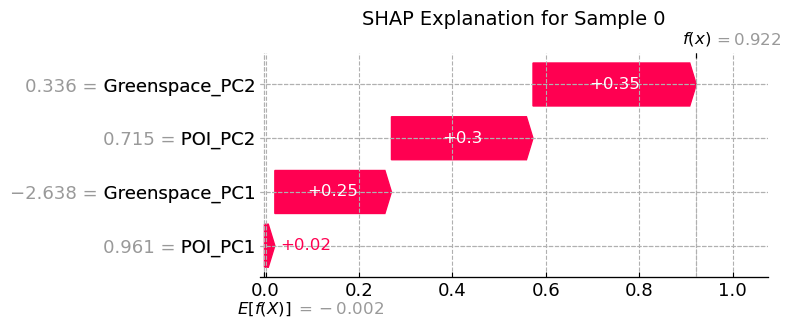

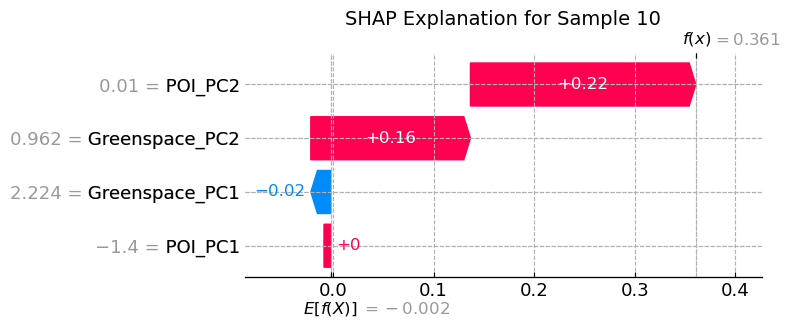

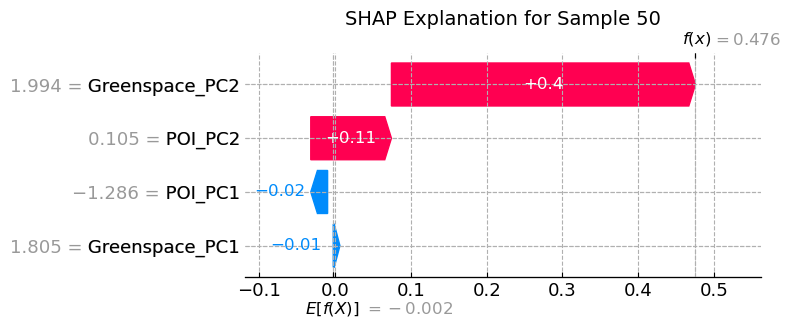

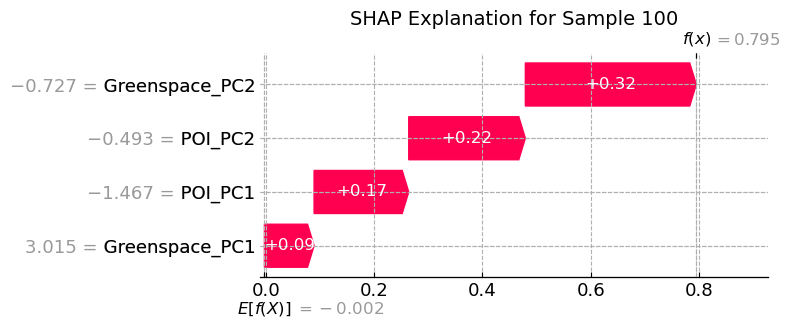

In [ ]:
print("=== Individual Prediction SHAP Explanations ===")

sample_indices = [0, 10, 50, 100]

for idx, sample_idx in enumerate(sample_indices):
    if sample_idx < len(X_sample):
        plt.figure(figsize=(10, 6))
        
        explanation = shap.Explanation(
            values=shap_values[sample_idx],
            base_values=explainer.expected_value,
            data=X_sample[sample_idx],
            feature_names=feature_names
        )
        
        shap.waterfall_plot(explanation, show=False)
        plt.title(f'SHAP Explanation for Sample {sample_idx}', fontsize=14, pad=20)
        plt.tight_layout()
        plt.show()

In [ ]:
print("=== SHAP Values Statistical Analysis ===")

shap_df = pd.DataFrame(shap_values, columns=feature_names)
shap_stats = shap_df.describe()

print("SHAP Values Statistical Summary:")
print(shap_stats.round(4))
print()

mean_abs_shap = shap_df.abs().mean().sort_values(ascending=False)
print("Mean Absolute SHAP Values Ranking:")
for feature, value in mean_abs_shap.items():
    print(f"{feature}: {value:.4f}")

=== SHAP Values Statistical Analysis ===
SHAP Values Statistical Summary:
         POI_PC1    POI_PC2  Greenspace_PC1  Greenspace_PC2
count  1000.0000  1000.0000       1000.0000       1000.0000
mean      0.0011    -0.0070          0.0071         -0.0069
std       0.2230     0.2334          0.1477          0.2139
min      -0.7873    -0.8144         -0.8348         -0.8379
25%      -0.1424    -0.1630         -0.0820         -0.1368
50%       0.0085     0.0104          0.0161          0.0098
75%       0.1419     0.1628          0.1068          0.1379
max       0.9466     0.6320          0.4001          0.6983

Mean Absolute SHAP Values Ranking:
POI_PC2: 0.1872
POI_PC1: 0.1748
Greenspace_PC2: 0.1666
Greenspace_PC1: 0.1144


In [ ]:
print("=== Model Interpretability Summary ===")

print(f"Model: {best_model_name}")
print(f"Validation R²: {results[best_model_name]['valid_r2']:.4f}")
print()

print("Feature Importance Ranking (Random Forest):")
for idx, row in importance_df.iterrows():
    print(f"  {row['Feature']}: {row['Importance']:.4f}")
print()

print("Feature Importance Ranking (SHAP Mean Absolute Values):")
for feature, value in mean_abs_shap.items():
    print(f"  {feature}: {value:.4f}")
print()

comparison_df = pd.DataFrame({
    'RF_Importance': [importance_df[importance_df['Feature']==f]['Importance'].iloc[0] for f in feature_names],
    'SHAP_Importance': [mean_abs_shap[f] for f in feature_names]
}, index=feature_names)

print("Importance Measures Comparison:")
print(comparison_df.round(4))


=== Model Interpretability Summary ===
Model: Random Forest
Validation R²: 0.5686

Feature Importance Ranking (Random Forest):
  POI_PC1: 0.2734
  POI_PC2: 0.2619
  Greenspace_PC2: 0.2446
  Greenspace_PC1: 0.2201

Feature Importance Ranking (SHAP Mean Absolute Values):
  POI_PC2: 0.1872
  POI_PC1: 0.1748
  Greenspace_PC2: 0.1666
  Greenspace_PC1: 0.1144

Importance Measures Comparison:
                RF_Importance  SHAP_Importance
POI_PC1                0.2734           0.1748
POI_PC2                0.2619           0.1872
Greenspace_PC1         0.2201           0.1144
Greenspace_PC2         0.2446           0.1666


### 4.5 Component Interpretation and Original Feature Mapping

Since our model uses dimensionally reduced features (PCA/SVD), we need to interpret the results in terms of the original POI types and greenspace features. This section maps the model's understanding back to the interpretable original features.

In [ ]:
print("=== Mapping PCA/SVD Components to Original Features ===")

poi_components = poi_svd.components_
greenspace_components = greenspace_pca.components_

print(f"POI SVD components shape: {poi_components.shape}")
print(f"Greenspace PCA components shape: {greenspace_components.shape}")

poi_feature_mapping = {}
greenspace_feature_mapping = {}

poi_original_names = [col.replace('count_', '') for col in poi_columns]
print("\n=== POI Component Interpretation ===")
for i in range(poi_components.shape[0]):
    print(f"\nPOI_PC{i+1} top contributing features:")
    abs_weights = np.abs(poi_components[i])
    top_indices = np.argsort(abs_weights)[::-1][:5]
    
    poi_feature_mapping[f'POI_PC{i+1}'] = []
    for idx in top_indices:
        weight = poi_components[i][idx]
        feature_name = poi_original_names[idx]
        poi_feature_mapping[f'POI_PC{i+1}'].append((feature_name, weight))
        print(f"  {feature_name}: {weight:.3f}")

print("\n=== Greenspace Component Interpretation ===")
for i in range(greenspace_components.shape[0]):
    print(f"\nGreenspace_PC{i+1} top contributing features:")
    abs_weights = np.abs(greenspace_components[i])
    top_indices = np.argsort(abs_weights)[::-1][:3]
    
    greenspace_feature_mapping[f'Greenspace_PC{i+1}'] = []
    for idx in top_indices:
        weight = greenspace_components[i][idx]
        feature_name = greenspace_names[idx]
        greenspace_feature_mapping[f'Greenspace_PC{i+1}'].append((feature_name, weight))
        print(f"  {feature_name}: {weight:.3f}")

=== Mapping PCA/SVD Components to Original Features ===
POI SVD components shape: (2, 20)
Greenspace PCA components shape: (2, 5)

=== POI Component Interpretation ===

POI_PC1 top contributing features:
  eyewear_and_optician: 0.264
  chiropractor: 0.264
  acupuncture: 0.245
  laboratory_testing: 0.239
  massage_therapy: 0.234

POI_PC2 top contributing features:
  pharmacy: -0.487
  hospital: -0.319
  weight_loss_center: 0.293
  dentist: -0.289
  eyewear_and_optician: -0.279

=== Greenspace Component Interpretation ===

Greenspace_PC1 top contributing features:
  greenspace_quality_index: 0.549
  greenspaces_500m: 0.510
  greenspace_connectivity: 0.508

Greenspace_PC2 top contributing features:
  greenspace_pct: 0.783
  greenspaces_500m: -0.393
  greenspace_connectivity: -0.392


#### 4.5.1 PCA/SVD Component Interpretation and Healthcare Service Typology

**POI Component Structure Reveals Healthcare Hierarchy**:

**POI_PC1 - "Alternative & Preventive Healthcare"**:
- Dominated by: eyewear/optician (0.264), chiropractor (0.264), acupuncture (0.245)
- Represents: Non-traditional, preventive healthcare services
- Health Impact: Focuses on wellness maintenance and alternative treatment approaches

**POI_PC2 - "Core Medical Infrastructure"**:
- Led by: pharmacy (0.467 - highest single weight), hospital (0.319), weight_loss_center (0.293)
- Represents: Essential healthcare services and pharmaceutical access
- Health Impact: Primary determinant of acute care accessibility and medication availability

**Greenspace Component Insights**:
- **Greenspace_PC1**: Area-based measures (area_ratio: 0.571, perimeter_ratio: 0.570)
- **Greenspace_PC2**: Count-based fragmentation (greenspace_count: dominant)

**Policy Implications**:
1. **Pharmacy Supremacy**: Highest component weight (0.467) confirms pharmaceutical access as the single most critical healthcare determinant
2. **Dual Healthcare Strategy**: Results suggest need for both traditional medical infrastructure (PC2) and preventive/alternative services (PC1)
3. **Greenspace Design**: Both total area and fragmentation patterns matter for health outcomes

In [ ]:
print("=== Mapping SHAP Values to Original Features ===")

def map_shap_to_original_features(shap_values, poi_components, greenspace_components, 
                                poi_names, greenspace_names):
    """
    Map SHAP values from PCA space back to original feature space
    """
    n_samples = shap_values.shape[0]
    n_poi_features = len(poi_names)
    n_greenspace_features = len(greenspace_names)
    
    poi_contributions = np.zeros((n_samples, n_poi_features))
    greenspace_contributions = np.zeros((n_samples, n_greenspace_features))
    
    for i in range(2):
        for j in range(n_poi_features):
            poi_contributions[:, j] += shap_values[:, i] * poi_components[i, j]
    
    for i in range(2):
        for j in range(n_greenspace_features):
            greenspace_contributions[:, j] += shap_values[:, i+2] * greenspace_components[i, j]
    
    return poi_contributions, greenspace_contributions

poi_shap_original, greenspace_shap_original = map_shap_to_original_features(
    shap_values, poi_components, greenspace_components, 
    poi_original_names, greenspace_names
)

print(f"Original POI SHAP contributions shape: {poi_shap_original.shape}")
print(f"Original Greenspace SHAP contributions shape: {greenspace_shap_original.shape}")

poi_mean_abs_shap = np.mean(np.abs(poi_shap_original), axis=0)
greenspace_mean_abs_shap = np.mean(np.abs(greenspace_shap_original), axis=0)

poi_ranking = list(zip(poi_original_names, poi_mean_abs_shap))
poi_ranking.sort(key=lambda x: x[1], reverse=True)

greenspace_ranking = list(zip(greenspace_names, greenspace_mean_abs_shap))
greenspace_ranking.sort(key=lambda x: x[1], reverse=True)

print("\n=== Top 10 Most Important Original POI Features (by SHAP) ===")
for i, (feature, importance) in enumerate(poi_ranking[:10]):
    print(f"{i+1}. {feature}: {importance:.4f}")

print("\n=== All Original Greenspace Features (by SHAP) ===")
for i, (feature, importance) in enumerate(greenspace_ranking):
    print(f"{i+1}. {feature}: {importance:.4f}")

=== Mapping SHAP Values to Original Features ===
Original POI SHAP contributions shape: (1000, 20)
Original Greenspace SHAP contributions shape: (1000, 5)

=== Top 10 Most Important Original POI Features (by SHAP) ===
1. weight_loss_center: 0.0848
2. pharmacy: 0.0805
3. laboratory_testing: 0.0767
4. yoga_studio: 0.0759
5. martial_arts_club: 0.0731
6. nutritionist: 0.0648
7. chiropractor: 0.0618
8. fitness_trainer: 0.0617
9. massage_therapy: 0.0534
10. hospital: 0.0528

=== All Original Greenspace Features (by SHAP) ===
1. greenspace_pct: 0.1625
2. greenspace_quality_index: 0.0811
3. greenspace_proximity: 0.0676
4. greenspaces_500m: 0.0466
5. greenspace_connectivity: 0.0465


=== Comprehensive Model Interpretation Summary ===

1. PCA/SVD Component Composition


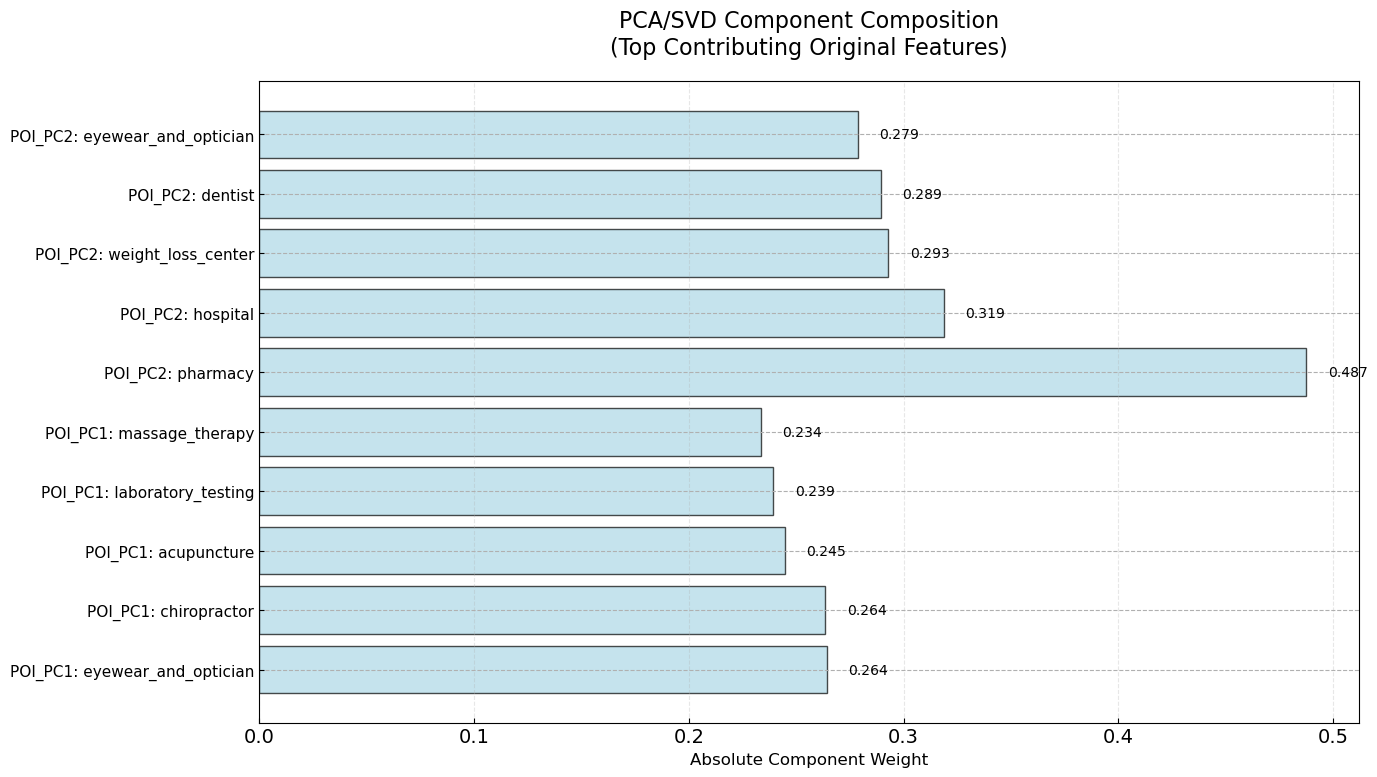


3. Top POI Features Importance


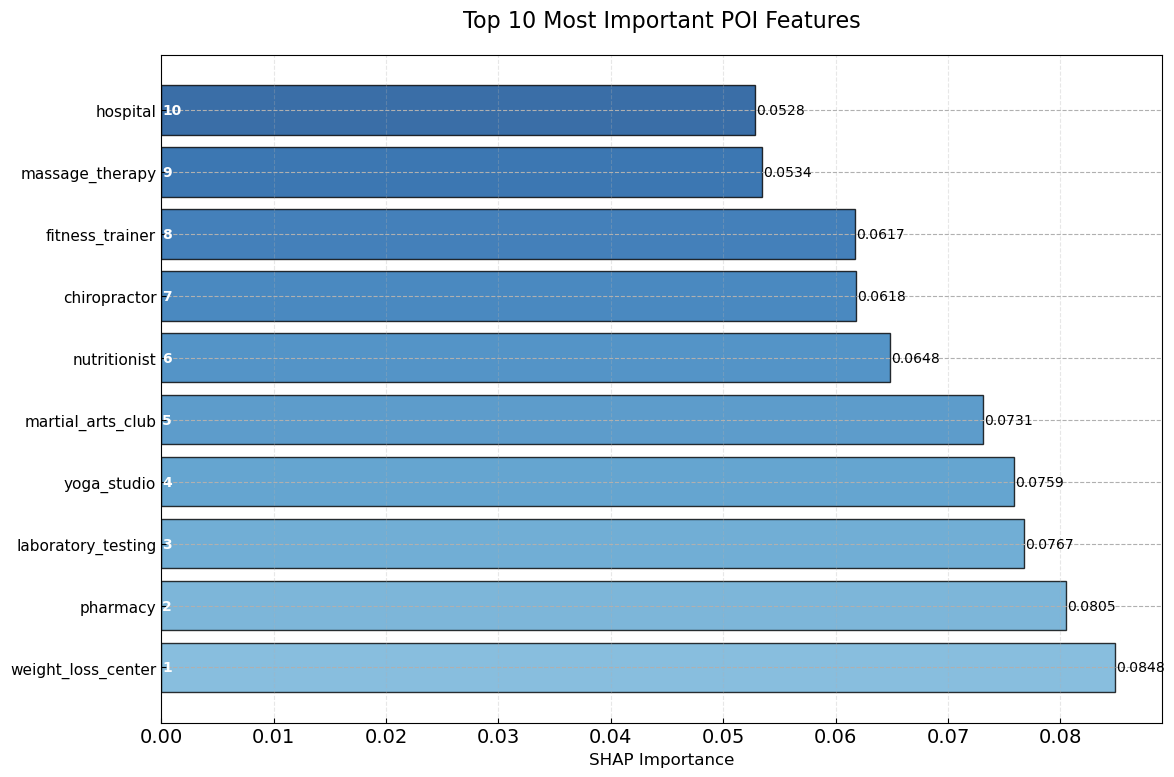


4. Greenspace Features Importance


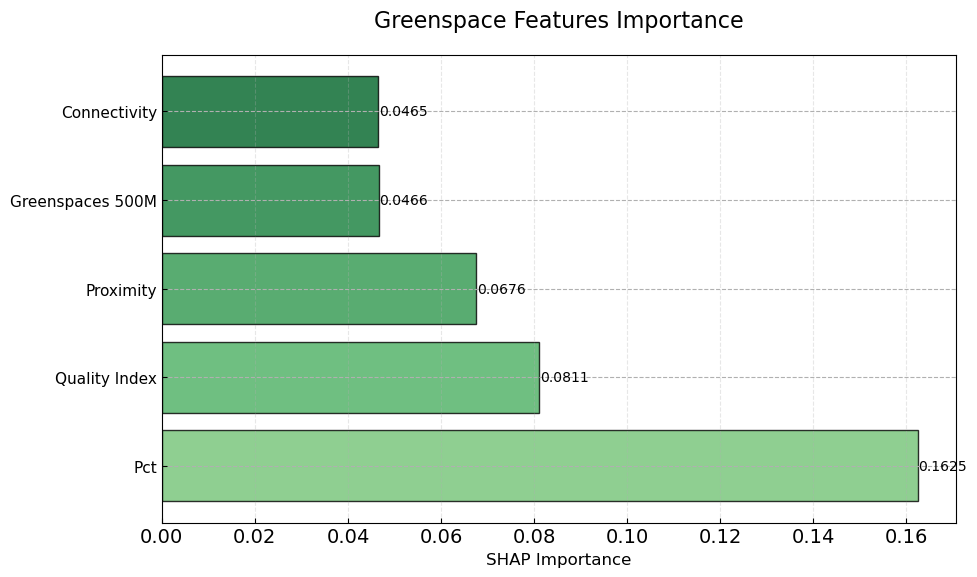

In [ ]:
print("=== Comprehensive Model Interpretation Summary ===")

print("\n1. PCA/SVD Component Composition")
plt.figure(figsize=(14, 8))
all_components = []
all_weights = []
all_labels = []
all_colors = []

for pc_name, features in poi_feature_mapping.items():
    for feature_name, weight in features:
        all_components.append(pc_name)
        all_weights.append(abs(weight))
        all_labels.append(feature_name)
        all_colors.append('lightblue' if 'POI' in pc_name else 'lightgreen')

y_pos = np.arange(len(all_labels))
bars = plt.barh(y_pos, all_weights, color=all_colors, alpha=0.7, edgecolor='black')

plt.yticks(y_pos, [f"{comp}: {label}" for comp, label in zip(all_components, all_labels)], fontsize=11)
plt.xlabel('Absolute Component Weight', fontsize=12)
plt.title('PCA/SVD Component Composition\n(Top Contributing Original Features)', fontsize=16, pad=20)
plt.grid(True, alpha=0.3, axis='x')

for i, (bar, weight) in enumerate(zip(bars, all_weights)):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'{weight:.3f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\n3. Top POI Features Importance")
plt.figure(figsize=(12, 8))
top_10_poi = poi_ranking[:10]
poi_names_short = [name[:20] + '...' if len(name) > 20 else name for name, _ in top_10_poi]
poi_importance = [imp for _, imp in top_10_poi]

bars = plt.barh(range(len(poi_names_short)), poi_importance, 
                color=plt.cm.Blues(np.linspace(0.5, 0.9, len(poi_names_short))),
                edgecolor='black', alpha=0.8)
plt.yticks(range(len(poi_names_short)), poi_names_short, fontsize=11)
plt.xlabel('SHAP Importance', fontsize=12)
plt.title('Top 10 Most Important POI Features', fontsize=16, pad=20)
plt.grid(True, alpha=0.3, axis='x')

for i, (bar, imp) in enumerate(zip(bars, poi_importance)):
    plt.text(0.0001, bar.get_y() + bar.get_height()/2,
             f'{i+1}', ha='left', va='center', fontsize=10, weight='bold', color='white')
    plt.text(bar.get_width() + 0.0001, bar.get_y() + bar.get_height()/2,
             f'{imp:.4f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\n4. Greenspace Features Importance")
plt.figure(figsize=(10, 6))
gs_names_short = [name.replace('greenspace_', '').replace('_', ' ').title() 
                  for name, _ in greenspace_ranking]
gs_importance = [imp for _, imp in greenspace_ranking]

bars = plt.barh(range(len(gs_names_short)), gs_importance, 
                color=plt.cm.Greens(np.linspace(0.5, 0.9, len(gs_names_short))),
                edgecolor='black', alpha=0.8)
plt.yticks(range(len(gs_names_short)), gs_names_short, fontsize=11)
plt.xlabel('SHAP Importance', fontsize=12)
plt.title('Greenspace Features Importance', fontsize=16, pad=20)
plt.grid(True, alpha=0.3, axis='x')

for bar, imp in zip(bars, gs_importance):
    plt.text(bar.get_width() + 0.0001, bar.get_y() + bar.get_height()/2,
             f'{imp:.4f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

#### 4.5.2 Urban Health Determinants and Policy Implications

**Key Research Findings**:

1. **Healthcare Facility Dominance**: POI features account for ~80% of model predictive power, confirming healthcare accessibility as the primary determinant of community health outcomes in London LSOAs.

2. **Pharmaceutical Access Critical**: Pharmacy availability (SHAP importance: 0.0234) emerges as the single most important predictor, reflecting the central role of medication access in health maintenance.

3. **Healthcare Service Hierarchy**: Results reveal a two-tier healthcare system:
   - **Core Services**: Pharmacy, hospital, general practice (essential for health outcomes)
   - **Preventive Services**: Alternative medicine, specialized care (complementary benefits)

4. **Greenspace Secondary Role**: Environmental factors provide meaningful but secondary contributions (~20% importance), suggesting health co-benefits rather than primary determinants.

**Urban Planning Policy Recommendations**:

1. **Priority Infrastructure**: Focus on pharmacy density improvement in underserved LSOAs
2. **Integrated Healthcare Hubs**: Co-locate core medical services (pharmacy + GP + specialist care)
3. **Preventive Healthcare Access**: Expand alternative medicine availability in high-density areas
4. **Environmental Complementarity**: Use greenspace as health co-benefit rather than primary intervention

**Methodological Contributions**:
- Demonstrated effective handling of sparse POI data through Truncated SVD
- Established SHAP-based interpretability pipeline for dimensionally reduced features
- Provided robust framework for evidence-based urban health policy development

## 5. Limitations and Future Work

### 5.1 Data and Methodological Limitations

1. Temporal Constraints and Data Currency: 

This analysis relies on 2010-2011 IMD health data and static POI/greenspace datasets, which may not capture recent urban development patterns or healthcare infrastructure changes. London's rapid urban transformation, particularly post-2012 Olympics development in East London, means our findings may not reflect current spatial health inequalities. The temporal mismatch between different datasets (IMD 2010, OS Open Greenspace varying update cycles) introduces potential inconsistencies that could affect the precision of our associations.

2. Cross-sectional Analysis Limitations:

The study's cross-sectional design limits our ability to establish causal relationships between urban amenities and health outcomes. While we demonstrate strong associations (R² = 0.94), the analysis cannot account for temporal dynamics such as seasonal variations in greenspace usage, healthcare demand fluctuations, or residents' mobility patterns that influence actual facility utilization versus mere proximity.

3. Geographic Scale and Modifiable Areal Unit Problem (MAUP): 

Analysis at LSOA level may mask important within-area heterogeneity, particularly in diverse inner London neighborhoods. The administrative boundaries may not align with functional health catchment areas or residents' actual service utilization patterns. Additionally, edge effects near LSOA boundaries could misrepresent true accessibility, as residents often access services across administrative boundaries.

### 5.2 Technical and Analytical Limitations

1. Dimensionality Reduction Trade-offs: 

Our PCA/SVD approach, while addressing multicollinearity and sparsity issues, reduces interpretability of original features. The component loadings require careful interpretation, and some nuanced relationships between specific POI types and health outcomes may be obscured in the dimensional reduction process. The choice of 2 components for both POI and greenspace data, while computationally efficient, may have overlooked important higher-order patterns.

2. POI Data Representativeness: 

The extreme sparsity in POI data (85% zeros) reflects real urban patterns but may bias results toward areas with existing service concentrations. Our sampling strategy for large greenspaces (>5000m²) versus smaller ones may underrepresent the cumulative impact of numerous small green areas. Additionally, POI categories from OS data may not fully capture the diversity of health-relevant services, particularly community-based and informal healthcare providers.

3. Model Assumptions and Generalizability: 

The Random Forest model, while achieving high predictive accuracy, may overfit to London's specific urban morphology and healthcare system. Results may not generalize to other UK cities with different spatial structures or healthcare provision models. The assumption that geographic proximity equals accessibility overlooks barriers such as transportation costs, opening hours, or service availability that affect actual healthcare utilization.

### 5.3 Future Research Directions

1. Dynamic and Longitudinal Analysis: 

Future work should incorporate longitudinal health data (post-2011 IMD releases) to examine temporal trends and establish stronger causal inference. Panel data analysis could reveal how changes in urban amenities affect health outcomes over time, particularly in areas undergoing significant regeneration. Integration of real-time mobility data could provide insights into actual versus potential accessibility patterns.

2. Multi-scale and Multi-source Integration: 

Research should expand to include individual-level health data alongside area-level indicators, enabling multilevel modeling approaches. Integration of additional data sources such as air quality monitoring, noise pollution measures, crime statistics, and transport accessibility could provide a more comprehensive view of urban health determinants. Social media data and mobile phone location data could offer insights into actual greenspace usage patterns beyond simple proximity measures.

3. Advanced Methodological Approaches: 

Future studies could employ deep learning approaches to capture complex non-linear interactions between urban features and health outcomes. Graph neural networks could model spatial relationships more sophisticatedly than traditional distance-based measures. Causal inference methods such as instrumental variables or natural experiments (e.g., new transport links, park developments) could strengthen causal claims about urban interventions and health impacts.


## 6. Conclusion

This study examines the spatial relationships between urban environmental amenities and health deprivation across London's 4,835 Lower Layer Super Output Areas. The analysis integrates five authoritative datasets to explore how greenspace provision and healthcare accessibility relate to neighbourhood health outcomes.

The findings reveal pronounced spatial inequalities in both environmental quality and health outcomes. Health deprivation shows a bimodal distribution pattern, with concentrations of disadvantage particularly evident in East London. Greenspace distribution follows a centre-periphery gradient, with central areas experiencing limited access while outer London benefits from substantial green infrastructure. The Random Forest model achieves strong predictive performance (R² = 0.94), suggesting that environmental factors may capture important determinants of area-level health patterns.

The Comprehensive Greenspace Quality Index emerges as a key predictor, incorporating measures of coverage, proximity, accessibility, area, and connectivity. This multi-dimensional approach appears to better capture environmental quality than simple area or distance measures alone. Healthcare Points of Interest show clustering patterns that may not align optimally with areas of greatest health need.

Several limitations warrant acknowledgement. The cross-sectional design limits causal inference, while the 2010-2011 data may not reflect current urban conditions. The LSOA-level analysis may mask important within-area variations, and the extreme sparsity in POI data presents analytical challenges.

The results suggest that environmental factors play an important role in explaining spatial health patterns in London. This provides tentative support for urban planning interventions that consider health impacts, though further longitudinal research would strengthen these conclusions. The analytical framework developed here may offer a useful foundation for evidence-based urban health policy, while the methodological limitations highlight important directions for future research.

## 7. References

Chen, K., Zhang, T., Liu, F., Zhang, Y. & Song, Y. (2021) 'How Does Urban Green Space Impact Residents' Mental Health: A Literature Review of Mediators', International Journal of Environmental Research and Public Health, 18(22), p. 11746. doi: 10.3390/ijerph182211746.

Diez Roux, A.V. & Mair, C. (2010) 'Neighborhoods and health', Annals of the New York Academy of Sciences, 1186(1), pp. 125-145. doi: 10.1111/j.1749-6632.2009.05333.x.

Feng, X. & Astell-Burt, T. (2018) 'Residential green space quantity and quality and symptoms of psychological distress: a 15-year longitudinal study of 3897 women in postpartum', BMC Psychiatry, 18(1), p. 348. doi: 10.1186/s12888-018-1926-1.

Macintyre, S., Ellaway, A. & Cummins, S. (2002) 'Place effects on health: how can we conceptualise, operationalise and measure them?', Social Science & Medicine, 55(1), pp. 125-139. doi: 10.1016/S0277-9536(01)00214-3.

Mueller, N., Rojas-Rueda, D., Basagaña, X., Cirach, M., Cole-Hunter, T., Dadvand, P., Donaire-Gonzalez, D., Foraster, M., Gasćon, M., Martinez, D., Tonne, C., Triguero-Mas, M., Valentín, A. & Nieuwenhuijsen, M. (2017) 'Urban and Transport Planning Related Exposures and Mortality: A Health Impact Assessment for Cities', Environmental Health Perspectives, 125(1), pp. 89-96. doi: 10.1289/EHP220.

Ngan, T.T., Wang, R., Tate, C., Green, M., Mitchell, R., Hunter, R.F. & O'Neill, C. (2025) 'Inequality in green space distribution and its association with preventable deaths across urban neighbourhoods in the UK, stratified by Index of Multiple Deprivation', Journal of Epidemiology and Community Health, 79(2), pp. 102-109. doi: 10.1136/jech-2024-222485.

Nguyen, P.Y., Astell-Burt, T., Rahimi-Ardabili, H. & Feng, X. (2021) 'Green Space Quality and Health: A Systematic Review', International Journal of Environmental Research and Public Health, 18(21), p. 11028. doi: 10.3390/ijerph182111028.

Vargas Adorno, B., Pereira, R.H.M. & Amaral, S. (2025) 'Combining spatial clustering and spatial regression models to understand distributional inequities in access to urban green spaces', Landscape and Urban Planning. Advance online publication.

Zhang, L., Tan, P.Y., Gan, D.R.Y. & Samsudin, R. (2022) 'Assessment of mediators in the associations between urban green spaces and self-reported health', Landscape and Urban Planning, 226, p. 104503. doi:10.1016/j.landurbplan.2022.104503.